# How Does College Academic and Athletic Spending Impact Retention Rates?

![img](Images/Austin_Stadium.jpeg)

# Overview & Business Understanding

Retention rates are one of the most important student success metrics used by colleges in the US. Even a brief search on websites like [Inside Higher Ed](https://www.insidehighered.com/) or [The Chronicle of Higher Education](https://www.chronicle.com/) will return a number of articles describing the importance of retention rates and strategies for departments to increase student retention. Given that graduation is one of the primary goals of attending college, retention rates can be thought of as an early indicator of what graduation rates will be later down the road. Given the importance of retention rates, this project seeks to understand the relationship between retention rates and college spending patterns in both academics and athletics. The hope is that if there are patterns between spending and retention rates, that colleges can use that information to redirect funds to increase student retention.

[According to the National Center for Education Statistics (NCES)](https://nces.ed.gov/programs/coe/indicator/ctr), "Retention rates measure the percentage of first-time undergraduate students who return to the same institution the following fall, and graduation rates measure the percentage of first-time, full-time undergraduate students who complete their program at the same institution within a specified period of time." **Figure 1 below is from the NCES website linked above (I did not make this figure—it is copied from the NCES website),** which shows retention rates for all college, public, private nonprofit, and private for-profit institutions. The figure also includes additional information for three different acceptance rates: all, open, and less than 25%.

![img](Images/retention_rates_ipeds_fig1.png)

[Figure 1 from the NCES website (I did not make this figure—it is copied from the NCES website)](https://nces.ed.gov/programs/coe/indicator/ctr)

The target variable in this project will be student retention rates. Given that this project focuses on all types of college institutions, we can take the 81% rate indicated by the "All institutions—All acceptance rates" at the far left of figure 1 above to represent our average retention rate. This rate only includes full-time students, but many of the schools in this analysis have both full- and part-time students. Thus, I will create a "weighted retention rate" for each school calculated by adding the number of retained full- and part-time students, divided by the total number of students enrolled at the institution. [Part-time retention rates](https://nces.ed.gov/ipeds/TrendGenerator/app/build-table/7/33?rid=4&cid=1) are often much lower than full-time retention rates, which means many schools in this analysis will be below this 81% threshold. However, given the importance of retention rates for all students, I think it is okay to set a high bar for this metric.

In January 2013, Donna M. Desrochers with the [Delta Cost Project](https://deltacostproject.org/) at the American Institutes for Research produced a report titled ["Academic Spending Versus Athletic Spending: Who Wins?"](https://deltacostproject.org/sites/default/files/products/DeltaCostAIR_AthleticAcademic_Spending_IssueBrief.pdf). Desrochers makes a lot of great arguments throughout this article and examine several spending variables that I will attempt to recreate and study in this project—please refer to the full article for more detailed information. However, one broad summary of this article is provided in the conclusion on p. 11: "The belief that college sports are a financial boon to colleges and universities is generally misguided. Although some big-time college sports athletic departments are self-supporting—and some specific sports may be profitable enough to help support other campus sports programs—more often than not, the colleges and universities are subsidizing athletics, not the other way around. In fact, student fees or institutional subsidies (coming from tuition, state appropriations, endowments, or other revenue-generating activities on campus) often support even the largest NCAA Division I college sports programs."

This project will first focus in part on college athletic spending, given that one of the concerns facing some schools in the NCAA is the so-called ["college athletics arms race"](https://www.latimes.com/opinion/story/2021-04-11/ncaa-alston-professionalization-coaches-salaries). As Tom McMillen (former U.S. representative from Maryland) states, "Based on its current trajectory, the increasing cost and professionalization of college sports will cause hundreds of non-revenue-generating Olympic sports to be cut, thousands of student-athletes in sports that don’t make money to lose their college scholarships, and student athletic fees and institutional subsidies to continue rising." 

McMillen goes on to say that "even with nearly \\$9 billion in revenue pouring into FBS programs, primarily from TV contracts, only 25 intercollegiate athletic programs generate more revenue than they spend. How do the vast majority of programs keep up? The intercollegiate athletic arms race is fueled in large part by university funding and student athletic fees that are used to buttress athletic budgets. The average institutional subsidy to athletics has grown to roughly \\$16 million per year per school. Mandatory student athletic fees now exceed \\$1,500 per year at many Division I schools, driving up the cost of college attendance." This information is relevant to student retention rates, given that as the cost of attending college continues to rise, many potential students are opting to not attend college in the first place, or they drop out before graduation because they cannot afford to pay tuition and support themselves outside of school.

[Mark J. Drozdowski reinforces this point](https://www.bestcolleges.com/blog/do-college-sports-make-money/), stating that "only 25 of the approximately 1,100 schools across 102 conferences in the NCAA made money on college sports [in 2019]." However, one potential issue is that some colleges are trying to spend on athletics programs as if they are one of those 25 schools and thus end up operating in the red. This is what makes the "college athletics arms race" unsustainable, and why I think it is important for colleges to consider redirecting spending towards other areas of the institution that will have benefit for a greater amount of the student body.

College football often generates the most revenue but is also often the most expensive program in a collegiate athletics department, so for that reason this project will focus on college athletics through the lens of football. There are a variety of ways to group the schools that make up the NCAA, but for ease of interpretation we can think of the NCAA in three divisions:
- Football Bowl Subdivision (FBS).
- Football Champion Subdivision (FCS)
- No Football Subdivision (NFS)

One goal of this project will be to understand how these spending metrics and retention rates vary based on the type of institution and NCAA subdivision.

This project will also examine how some of these metrics have varied between the academic years 2005–2019. While there is more recent data available, I have decided to make 2018–19 the last year included in the analysis given the impact of the COVID-19 pandemic in the spring 2020 semester. Given that there were so many institutions and students that handled the pandemic differently, I figured that this more recent data might have negative impacts on the modeling used in this project. This will be addressed later in the "Future Directions" section of this notebook.

---

# Data Understanding

The data used in this project comes from three sources:

1) [The Knight Commission on Intercollegiate Athletics](https://www.knightcommission.org/)
- Includes 'NCAA Subdivision' and 'FBS Conference' information
    - Note that schools in the FCS and NFS NCAA Subdivisions, they will have N/A listed for 'FBS Conference'
- Includes many columns about college athletic finances: 
    - Expenses: 
        - 'Total Expenses', 'Excess Transfers Back', 'Other Expenses', 'Medical', 'Competition Guarantees', 'Recruiting', 'Game Expenses and Travel', 'Facilities and Equipment', 'Coaches Compensation', 'Support and Admin Compensation w/Severance', 'Athletic Student Aid',
    - Revenues: 
        - 'Total Revenues', 'Other Revenue', 'Corporate Sponsorship, Advertising, Licensing', 'Donor Contributions', 'Competition Guarantees.1', 'NCAA/Conference Distributions, Media Rights, and Post-Season Football', 'Ticket Sales', 'Institutional/Government Support', 'Student Fees', 'Total Institutional/Government Support and Student Fees',
    - Broader institutional metrics:       
        - 'Total Academic Spending (University-Wide)', 'Total Football Spending', 'Total Football Coaching Salaries', 'Athletics Related Debt', 'Annual Debt Service, Leases and Rental Fees on Athletic Facilities'

2) [The US Department of Education Equity in Athletics Data Analysis](https://ope.ed.gov/athletics/#/)
- Total Revenue and Expenses of each athletic department: 
    - 'Grand Total Revenue', 'Grand Total Expenses'. 
        - These are similar to the 'Total Revenues' and 'Total Expenses' columns from the Knight Commission, but appear to be more complete so they will be used instead.
- Total number of male and female student athletes at each institution: 
    - 'Total Male Participation', 'Total Female Participation'.
- Total number of head and assistant football coaches at each institution:
    - 'Total FB Coaches'

3) [NCES (National Center for Education Statistics) IPEDS (Integrated Postsecondary Education Data System)](https://nces.ed.gov/ipeds/)
- Enrollment data:
    - 'Total Enrollment', 'Full-time Enrollment', 'Part-time Enrollment'
- Average faculty salaries:
    - 'Average Faculty Salary'
- Endowment size:
    - 'Endowment'

### Reproducibility

For more detailed instructions regarding how I collected and merged the data from these three sources, please check out my 'Data Collection' notebook in the ['Reproducibility' folder in this GitHub repository](https://github.com/Shoemaker703/college_retention/tree/main/Reproducibility). This notebook contains step-by-step instructions (including screenshots) of how I gathered the data for the analysis below, in case you are interested in recreating and/or building on any part of this project.

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Function created with Andrew Whitman for bird conservation project 
# (https://github.com/andrewwhitman/BirdConservation/blob/main/BirdConservation.ipynb)
from utils import evaluate

%matplotlib inline

In [2]:
# Knight Commission data
knight = pd.read_excel('data/knight_05_19.xlsx')
knight.tail()

,Data,IPEDS ID,Year,NCAA Subdivision,FBS Conference,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,...,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Institutional/Government Support and Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
5290,Youngstown State University,206695,2015,Football Championship Subdivision,NaN,14946755.0,0.0,1467048.0,135000.0,270500.0,...,946702.0,486854.0,10734826.0,0.0,10734826.0,167483816.0,4169693.0,1349378.0,4869343.0,338177.0
5291,Youngstown State University,206695,2016,Football Championship Subdivision,NaN,14928633.0,0.0,1233793.0,157431.0,184000.0,...,1010774.0,531930.0,10209516.0,0.0,10209516.0,165196688.0,3949953.0,1198488.0,4788115.0,338236.0
5292,Youngstown State University,206695,2017,Football Championship Subdivision,NaN,15410657.0,0.0,1349715.0,75813.0,196000.0,...,1524096.0,504442.0,10401241.0,0.0,10401241.0,174854836.0,4023675.0,1273020.0,4269030.0,402410.0
5293,Youngstown State University,206695,2018,Football Championship Subdivision,NaN,15876225.0,0.0,1300023.0,99135.0,228700.0,...,1191052.0,560787.0,10947009.0,0.0,10947009.0,172957393.0,4097973.0,1231410.0,4423609.0,385733.0
5294,Youngstown State University,206695,2019,Football Championship Subdivision,NaN,16206122.0,0.0,1321552.0,172915.0,223145.0,...,1112890.0,484084.0,11595395.0,NaN,11595395.0,173648550.0,4349972.0,1330679.0,4216820.0,380378.0


In [3]:
# Equity in Athletics Data Analysis data
eada = pd.read_csv('data/eada_final.csv', index_col=0)
eada.tail()

,Survey Year,UNITID,Institution Name,Classification Name,Grand Total Revenue,Grand Total Expenses,Total Male Participation,Total Female Participation,Total FB Coaches
29486,2019,181853,York College,NAIA Division II,3805596,3805596,166.0,146.0,NaN
29487,2019,217059,York College of Pennsylvania,NCAA Division III without football,2857778,2638512,259.0,221.0,NaN
29488,2019,141361,Young Harris College,NCAA Division II without football,5751311,5751311,191.0,123.0,NaN
29489,2019,206695,Youngstown State University,NCAA Division I-FCS,16292051,16292051,260.0,187.0,11.0
29490,2019,126119,Yuba College,CCCAA,743969,743969,134.0,55.0,5.0


In [4]:
# NCES IPEDS data
ipeds_final = pd.read_excel('data/ipeds_final.xlsx', index_col=0)
ipeds_final.tail()

,unitid,institution name,year,Total Enrollment,Full-time Enrollment,Part-time Enrollment,Full-time Retention Rate,Part-time Retention Rate,Average Faculty Salary,Endowment
2485,206695,Youngstown State University,2015,12503,9410,3093,70,34.0,72207,232153783.0
2486,206695,Youngstown State University,2016,12442,9267,3175,75,47.0,71982,225565166.0
2487,206695,Youngstown State University,2017,12643,9497,3146,75,43.0,73535,217669111.0
2488,206695,Youngstown State University,2018,12521,9564,2957,77,58.0,72465,241403045.0
2489,206695,Youngstown State University,2019,12607,9687,2920,76,33.0,74001,259291802.0


### Merging data

In [5]:
# Merging Knight and EADA.
# Using inner merge to only retain schools in the Knight df, given the importance of the financial metrics
# contained in this df
knight_eada_merged = pd.merge(eada, knight, how='inner', left_on=['Survey Year', 'UNITID', 'Institution Name'], 
                        right_on = ['Year', 'IPEDS ID', 'Data'])

In [6]:
# Merging above df with NCES IPEDS data.
# Again using an inner merge.
df = pd.merge(knight_eada_merged, ipeds_final, how='inner',
              left_on=['Survey Year', 'UNITID', 'Institution Name'], 
              right_on = ['year', 'unitid', 'institution name'])

There is still a mismatch with the number of schools included in the Knight Commission data vs. the other data sets. My plan is to drop all of the rows that have missing values from the Knight Commission data to get the number of data points in the set more even. I am opting to focus on the Knight Commission data in this instance given that this includes a lot of relevant financial data that I do not want to lose.

In [7]:
df = df[df['Total Expenses'].notna()]

In [8]:
# At this point there are 166 unique institutions in the df
len(df['Institution Name'].unique())

166

In [9]:
# There are a lot of missing values and duplicate columns to deal with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 2489
Data columns (total 50 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Survey Year                                                            2416 non-null   int64  
 1   UNITID                                                                 2416 non-null   int64  
 2   Institution Name                                                       2416 non-null   object 
 3   Classification Name                                                    2416 non-null   object 
 4   Grand Total Revenue                                                    2416 non-null   int64  
 5   Grand Total Expenses                                                   2416 non-null   int64  
 6   Total Male Participation                                               2416 non-null   f

---

# Data Preparation

In [10]:
# There are two columns named "Competition Guarantees", so I will rename those columns for ease of interpretation.
df.rename(columns={'Competition Guarantees': 'Competition Guarantees (Expenses)', 
                  'Competition Guarantees.1': 'Competition Guarantees (Revenues)'},
         inplace=True)

In [11]:
# Replacing one Division II value with FCS (new term for conference)
df['NCAA Subdivision'].replace(to_replace='Division II', value='Football Championship Subdivision', inplace=True)

In [12]:
# Removing columns used in merges.
# Removing "Classification Name" because I have the same data from Knight Commission
# Removing "Total Expenses" and "Total Revenues" 
df = df.drop(columns=['Data', 'IPEDS ID', 'Year', 'unitid', 'institution name', 'year', 'Classification Name',
                      'Total Expenses', 'Total Revenues'])

In [13]:
# "FBS Conference" has missing values, but this is because not every school in this list is in the FBS. 
# Filling in missing values with 'N/A'.
df['FBS Conference'].fillna(value='N/A',inplace=True)

There are a number of columns with only a handful of missing values. Given that I do not know why these values are missing, I think the most reasonable solution for filling in these values is to replace them with the median value for the columns. The number of missing values in each column is ~1% or less of the total number of values, so I do not think this is will significantly affect the distributions of the original data. Here is a list of columns that will undergo this cleaning step:
- "Medical" has 5 missing values.
- "Competition Guarantees (Expenses)" has 7 missing values.
- "Competition Guarantees (Revenues)" has 6 missing values.
- "Recruiting" has 6 missing values.
- "Athletic Student Aid" has 5 missing values.
- "Corporate Sponsorship, Advertising, Licensing" has 9 missing values.
- "Ticket Sales" has 5 missing values.
- "Student Fees" has 33 missing values.
- "Endowment" has 29 missing values.

In [14]:
df['Medical'].fillna(df['Medical'].median(),inplace=True)
df['Competition Guarantees (Expenses)'].fillna(df['Competition Guarantees (Expenses)'].median(), inplace=True)
df['Competition Guarantees (Revenues)'].fillna(df['Competition Guarantees (Revenues)'].median(), inplace=True)
df['Recruiting'].fillna(df['Recruiting'].median(),inplace=True)
df['Athletic Student Aid'].fillna(df['Athletic Student Aid'].median(), inplace=True)
df['Corporate Sponsorship, Advertising, Licensing'].fillna(df['Corporate Sponsorship, Advertising, Licensing'].median(), inplace=True)
df['Ticket Sales'].fillna(df['Ticket Sales'].median(), inplace=True)
df['Student Fees'].fillna(df['Student Fees'].median(), inplace=True)
df['Endowment'].fillna(df['Endowment'].median(), inplace=True)

There are 43 schools in this list that are in the "No Football Subdivision" of the NCAA. This means that they do not have any football spending or coaching salaries, so I think it makes sense to fill in these rows with 0.0.

In [15]:
df['Total Football Spending'].fillna(value=0.0,inplace=True)
df['Total Football Coaching Salaries'].fillna(value=0.0,inplace=True)
df['Total FB Coaches'].fillna(value=0.0,inplace=True)

There are still 31 missing values in the "Part-Time Retention Rate" column. Given that retention rates are the focus of this study, I will drop rows with missing values. This only drops two institutions from the dataset, so I think this is worth the loss of data.

In [16]:
df = df[df['Part-time Retention Rate'].notna()]

98% of values in 'Excess Transfers Back' are 0.0, so it will be dropped

In [17]:
df.drop(columns='Excess Transfers Back', inplace=True)

With a couple hundred missing values in "Athletics Related Debt" and "Annual Debt Service, Leases and Rental Fees on Athletic Facilities," I did not feel comfortable filling in missing values. If I drop rows from these two debt related features, I still have 166 institutions in my data frame.

In [18]:
df = df[df['Athletics Related Debt'].notna()]
df = df[df['Annual Debt Service, Leases and Rental Fees on Athletic Facilities'].notna()]
len(df['Institution Name'].unique())

166

In [19]:
# The df now has no more missing values
df.isna().sum().sum()

0

### Feature Engineering

[The Delta Cost Project](https://deltacostproject.org/delta-cost-project-database) contains a lot of college spending data related to the amount of money spent on students as well as student athletes. Thus, I will do some feature engineering to try and recreate these variables for my own analysis.

In [20]:
# Creating new variable for the amount of academic spending per non student athlete
df['Academic Spending per FTE Student'] = round(df['Total Academic Spending (University-Wide)']/df['Total Enrollment'], 2)

In [21]:
# Creating total number of student athletes per institution
df['Total Student Athletes'] = df['Total Male Participation'] + df['Total Female Participation']
df.drop(columns=['Total Male Participation', 'Total Female Participation'], inplace=True)

In [22]:
# Creating new variable for the amount of athletic spending per student athlete
df['Athletic Spending per Student Athlete'] = round(df['Grand Total Expenses']/df['Total Student Athletes'],2)

# Dropping 'Total Student Athletes' now that I have used it to create this feature
df.drop(columns='Total Student Athletes', inplace=True)

In [23]:
# Creating new varibale to represent the ratio of how much a university spends per student athlete
# compared with how much they spend per FTE student
df['Ratio of Athletic Spending vs. Academic Spending'] = df['Athletic Spending per Student Athlete']/df['Academic Spending per FTE Student']

In [24]:
# Creating new variable that captures the average football coaching salary at each institution.
df['Average FB Coach Salary'] = round(df['Total Football Coaching Salaries']/df['Total FB Coaches'],2)
df['Average FB Coach Salary'].fillna(value=0.0,inplace=True)

# Dropping 'Total FB Coaches' column now that I have used it to create this feature
df.drop(columns='Total FB Coaches', inplace=True)

In [25]:
# University of Alabama at Birmingham is missing coach data which is causing problems with modeling later on.
# Thus, I will drop the two rows with missing values for 'Total FB Coaches'.
uab = df[df['Average FB Coach Salary']==df['Average FB Coach Salary'].max()]
df = df.drop(uab.index)

Now I will creating some new variables in order to capture the weighted average retention rate, which will be the target variable used in modeling later in this notebook.

In [26]:
# First, creating new variables for the number of retained full-time and part-time students.
df['No. Full-Time Students Retained'] = round(df['Full-time Enrollment']*(df['Full-time Retention Rate']/100))
df['No. Part-Time Students Retained'] = round(df['Part-time Enrollment']*(df['Part-time Retention Rate']/100))

# Dropping these four columns now that they have been used for this feature engineering.
df.drop(columns=['Full-time Enrollment', 'Part-time Enrollment', 
                   'Full-time Retention Rate', 'Part-time Retention Rate'], inplace=True)

In [27]:
# Now creating the weighted retention ratio by adding the number of retained full-time and part-time students
# and dividing by the total enrollment size
df['Weighted Retention Rate'] = round(((df['No. Full-Time Students Retained'] + df['No. Part-Time Students Retained'])/df['Total Enrollment'])*100, 2)

# Dropping these three columns now that they have been used for feature engineering
df.drop(columns=['No. Full-Time Students Retained', 'No. Part-Time Students Retained',
                'Total Enrollment'],inplace=True)

In [28]:
# Summary metrics for the complete df
print("No. of rows in df:         ",df.shape[0])
print("No. of features in df:     ",df.shape[1])
print(f"Years contained in df:      {df['Survey Year'].min()}–{df['Survey Year'].max()}")
print("No. of Unique Institutions:",len(df['Institution Name'].unique()))
print("No. of Missing Values:     ",(df.isna().sum().sum()))

No. of rows in df:          2077
No. of features in df:      37
Years contained in df:      2005–2019
No. of Unique Institutions: 166
No. of Missing Values:      0


---

# EDA

Given that 'Weighted Retention Rate' are the target variable for this project, let us begin by looking at the other features in the data set that have a strong correlation with this target.

As we can see, the top two correlations with 'Weighted Retention Rate' are 'Average Faculty Salary' and 'Total Academic Spending (University-Wide)'. This is not surprising given that spending on elements related to academics would seemingly be most strongly related to retention rates. The next several features are related to spending on athletics, followed by academic spending per student.

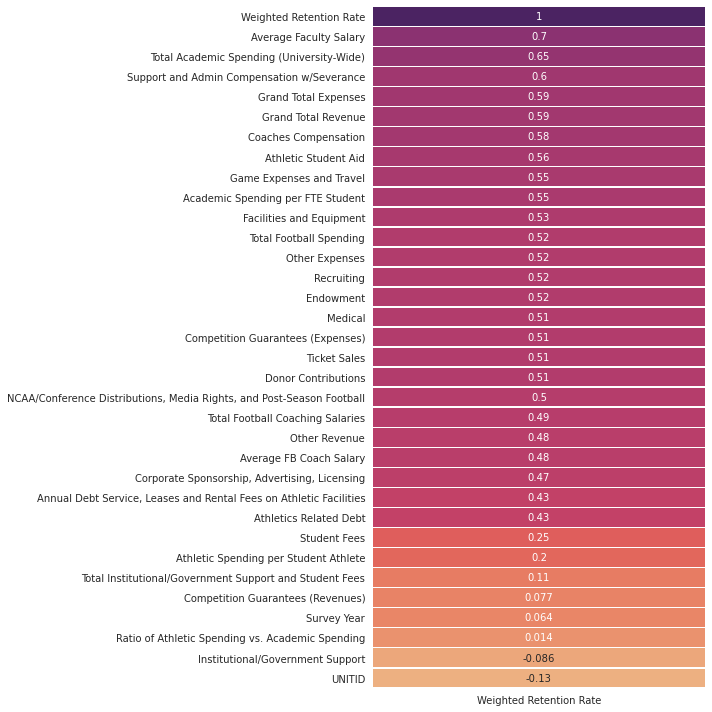

In [29]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr()[['Weighted Retention Rate']].sort_values(by = ['Weighted Retention Rate'], ascending = False), 
            annot=True, cbar=False, cmap="flare", linewidths=.5)
plt.tight_layout()
plt.savefig('Images/correlation_heatmap.png');

In [30]:
# Looking into correlations
top_10_corr = [i for i in df.corrwith(df['Weighted Retention Rate']).sort_values(ascending=False).head(10).keys()]
top_10_corr

['Weighted Retention Rate',
 'Average Faculty Salary',
 'Total Academic Spending (University-Wide)',
 'Support and Admin Compensation w/Severance',
 'Grand Total Expenses',
 'Grand Total Revenue',
 'Coaches Compensation',
 'Athletic Student Aid',
 'Game Expenses and Travel',
 'Academic Spending per FTE Student']

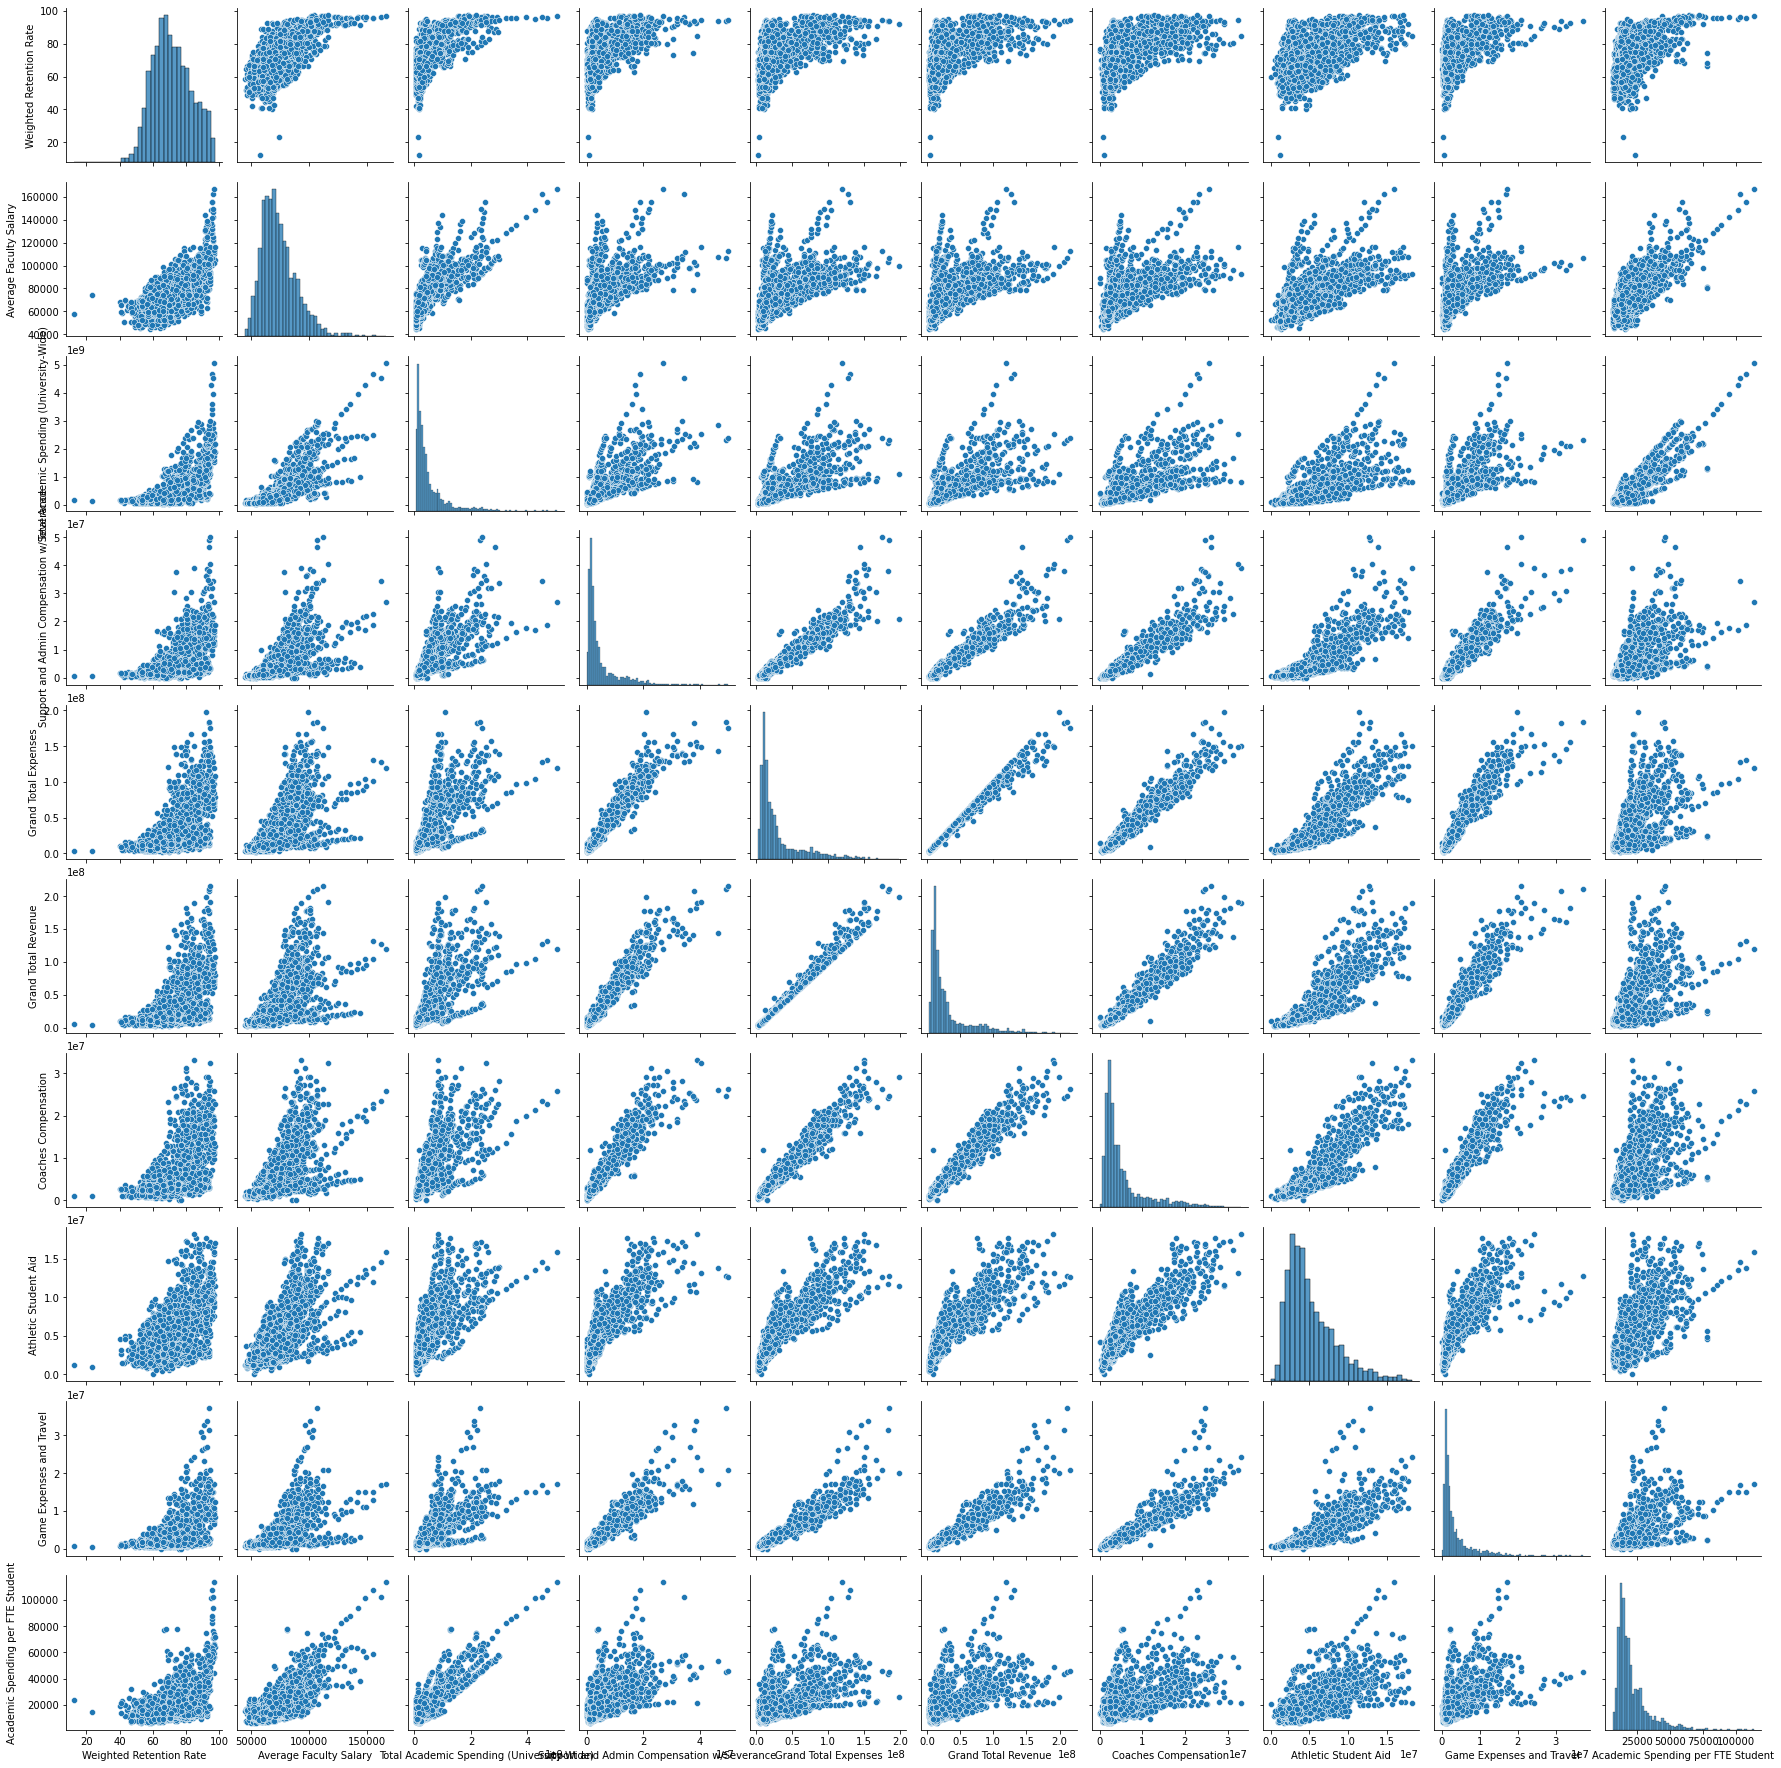

In [31]:
# Using a Seaborn pairplot to examine correlations between 'weighted retention rates' and other features
sns.pairplot(df, x_vars=top_10_corr, y_vars=top_10_corr);

In [32]:
# Looking over summary statistics for the numerical columns in this data set.
df.describe()

,Survey Year,UNITID,Grand Total Revenue,Grand Total Expenses,Other Expenses,Medical,Competition Guarantees (Expenses),Recruiting,Game Expenses and Travel,Facilities and Equipment,...,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities",Average Faculty Salary,Endowment,Academic Spending per FTE Student,Athletic Spending per Student Athlete,Ratio of Athletic Spending vs. Academic Spending,Average FB Coach Salary,Weighted Retention Rate
count,2077.000000,2077.000000,2.077000e+03,2.077000e+03,2.077000e+03,2.077000e+03,2.077000e+03,2.077000e+03,2.077000e+03,2.077000e+03,...,2.077000e+03,2.077000e+03,2.077000e+03,2077.000000,2.077000e+03,2077.000000,2.077000e+03,2077.000000,2.077000e+03,2077.000000
mean,2012.597978,174314.332691,3.199598e+07,3.053041e+07,3.628788e+06,4.590218e+05,6.436043e+05,4.980309e+05,3.656340e+06,6.037974e+06,...,2.048562e+06,2.771482e+07,2.211572e+06,74367.838710,2.684402e+08,21052.074420,7.267746e+04,3.687255,1.810923e+05,71.477886
std,4.112537,47395.477351,3.408494e+07,3.115120e+07,4.789547e+06,4.911003e+05,9.602550e+05,5.343874e+05,4.123231e+06,7.779250e+06,...,2.679418e+06,4.995455e+07,3.741709e+06,15959.454684,5.128242e+08,12459.944964,1.089591e+05,5.995429,2.367522e+05,11.602736
min,2005.000000,100654.000000,2.222989e+06,2.102031e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,44200.000000,0.000000e+00,6387.320000,8.906910e+03,0.558612,0.000000e+00,12.190000
25%,2009.000000,139940.000000,1.136812e+07,1.124306e+07,9.208290e+05,1.541610e+05,3.724300e+04,1.677510e+05,1.236244e+06,1.256355e+06,...,4.998040e+05,0.000000e+00,0.000000e+00,63185.000000,3.156876e+07,13112.660000,3.560858e+04,2.070969,4.937555e+04,62.970000
50%,2013.000000,166513.000000,1.765594e+07,1.741322e+07,1.712886e+06,3.014880e+05,1.695000e+05,2.932540e+05,2.000679e+06,2.997678e+06,...,9.780440e+05,6.937581e+06,6.595590e+05,71419.000000,7.769244e+07,17090.550000,4.896682e+04,3.006879,9.208730e+04,70.160000
75%,2016.000000,219471.000000,3.572543e+07,3.484089e+07,4.305655e+06,5.726500e+05,8.341410e+05,6.062140e+05,4.229328e+06,7.405032e+06,...,2.532780e+06,3.174084e+07,2.404790e+06,82636.000000,2.301620e+08,25057.410000,8.403699e+04,4.427746,2.226023e+05,79.820000
max,2019.000000,433660.000000,2.158291e+08,1.984072e+08,4.773009e+07,3.482014e+06,7.378442e+06,5.172890e+06,3.715658e+07,6.771078e+07,...,2.000617e+07,4.450200e+08,2.436230e+07,166775.000000,4.243440e+09,113410.670000,3.091521e+06,168.773441,1.818743e+06,97.490000


## Analyzing Trends in Data

In order to see how these metrics have changed over time, we can analyze trends in the data. This can provide a useful baseline understanding that might inform how we can interpret the results of the analysis later in this notebook.

In [33]:
# Creating a new copy of the original dataframe
df_time = df

# Converting "survey year" to date time
df_time['Survey Year'] = pd.to_datetime(df_time['Survey Year'], format='%Y')

# Setting new date time object as the index
df_time = df_time.set_index('Survey Year')

# Using groupby to create medians for evey numerical column in the dataframe
trends = df_time.groupby('Survey Year').median()

As this figure illustrates, there has not been a great deal of fluctuation with retention rates over the 15 years in this data set. 

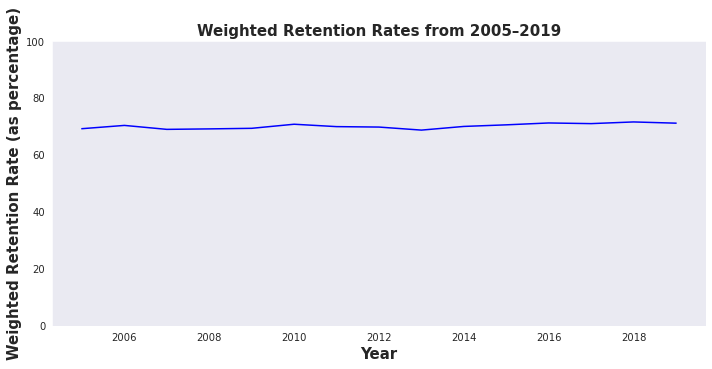

In [34]:
# Looking at retention rates.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = trends['Weighted Retention Rate'], x = trends.index, color='blue')
ax.set_title('Weighted Retention Rates from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Weighted Retention Rate (as percentage)', fontsize=15,fontweight='bold')
ax.set_ylim(bottom=0,top=100)
plt.tight_layout()
plt.savefig('Images/retention_rates.png');

We can see in this graph that despite the relatively stagnant retention rates, academic spending per FTE student and athletic spending per student athlete have both increased, the latter exponentially so.

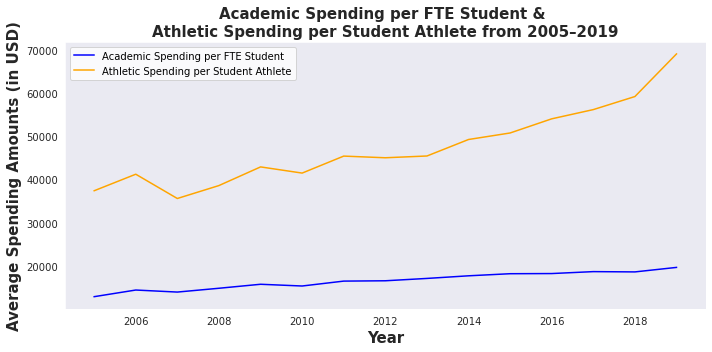

In [35]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = trends['Academic Spending per FTE Student'], x = trends.index, color='blue')
sns.lineplot(y = trends['Athletic Spending per Student Athlete'], x = trends.index, color='orange')
ax.set_title('Academic Spending per FTE Student & \nAthletic Spending per Student Athlete from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Average Spending Amounts (in USD)', fontsize=15,fontweight='bold')
ax.legend(labels = ['Academic Spending per FTE Student', 'Athletic Spending per Student Athlete'])
plt.tight_layout()
plt.savefig('Images/academic_athletic_spending.png');

This demonstrates that football coaching salaries have increased exponentially while average faculty salaries have been relatively stagnant.

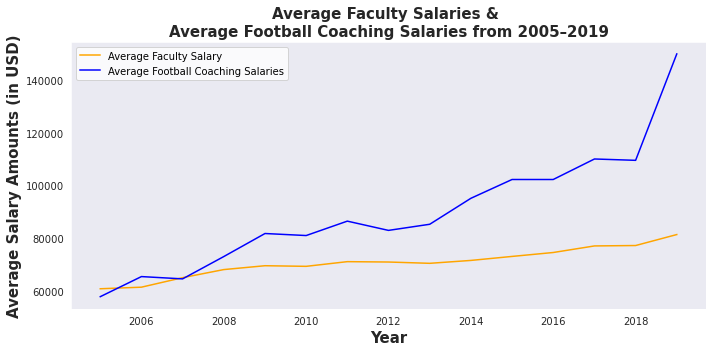

In [36]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = trends['Average Faculty Salary'], x = trends.index, color='orange')
sns.lineplot(y = trends['Average FB Coach Salary'], x = trends.index, color='blue')
ax.set_title('Average Faculty Salaries & \nAverage Football Coaching Salaries from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Average Salary Amounts (in USD)', fontsize=15,fontweight='bold')
ax.legend(labels = ['Average Faculty Salary', 'Average Football Coaching Salaries'])
plt.tight_layout()
plt.savefig('Images/salaries.png');

We can also do similar trend analysis for each of the three NCAA subdivisions.

In [37]:
# Creating three separate dataframes, one for each NCAA subdivision.
fbs = df_time[df_time['NCAA Subdivision'] == 'Football Bowl Subdivision']
fcs = df_time[df_time['NCAA Subdivision'] == 'Football Championship Subdivision']
nfs = df_time[df_time['NCAA Subdivision'] == 'No Football Subdivision']

# Creating median trend dataframes for each NCAA subdivision.
fbs_trends = fbs.groupby('Survey Year').median()
fcs_trends = fcs.groupby('Survey Year').median()
nfs_trends = nfs.groupby('Survey Year').median()

Given that weighted retention rates are the target for this analysis, we can plot all three NCAA subdivisions to see their relative performance with this metric. The plot below demonstrates that the FBS has the best of the three, followed by the NFS, and finally the FCS.

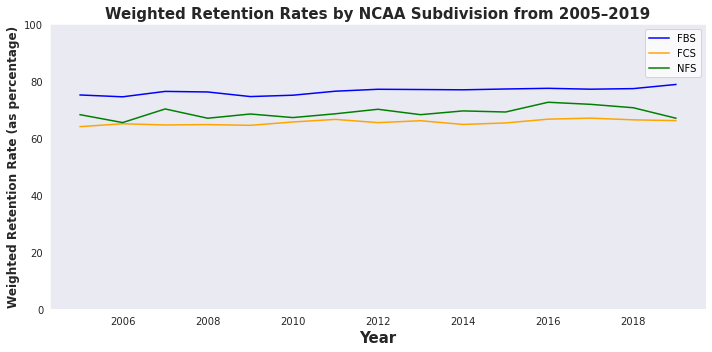

In [38]:
# Looking at weighted retention rates.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = fbs_trends['Weighted Retention Rate'], x = fbs_trends.index, color='blue')
sns.lineplot(y = fcs_trends['Weighted Retention Rate'], x = fcs_trends.index, color='orange')
sns.lineplot(y = nfs_trends['Weighted Retention Rate'], x = nfs_trends.index, color='green')
ax.set_title('Weighted Retention Rates by NCAA Subdivision from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Weighted Retention Rate (as percentage)', fontsize=12,fontweight='bold')
ax.set_ylim(bottom=0,top=100)
ax.legend(labels = ['FBS', 'FCS', 'NFS'])
plt.tight_layout()
plt.savefig('Images/retention_rates_ncaa.png');

The line plot below demonstrates that the FBS spends a significantly greater amount per student athlete than both the FCS and NFS. This is not particularly surprising, given that the FBS is the most competitive athletics division of the NCAA. However, we can see that FCS schools tend to spend less than their FBS and NFS counterparts in both academics and athletics.

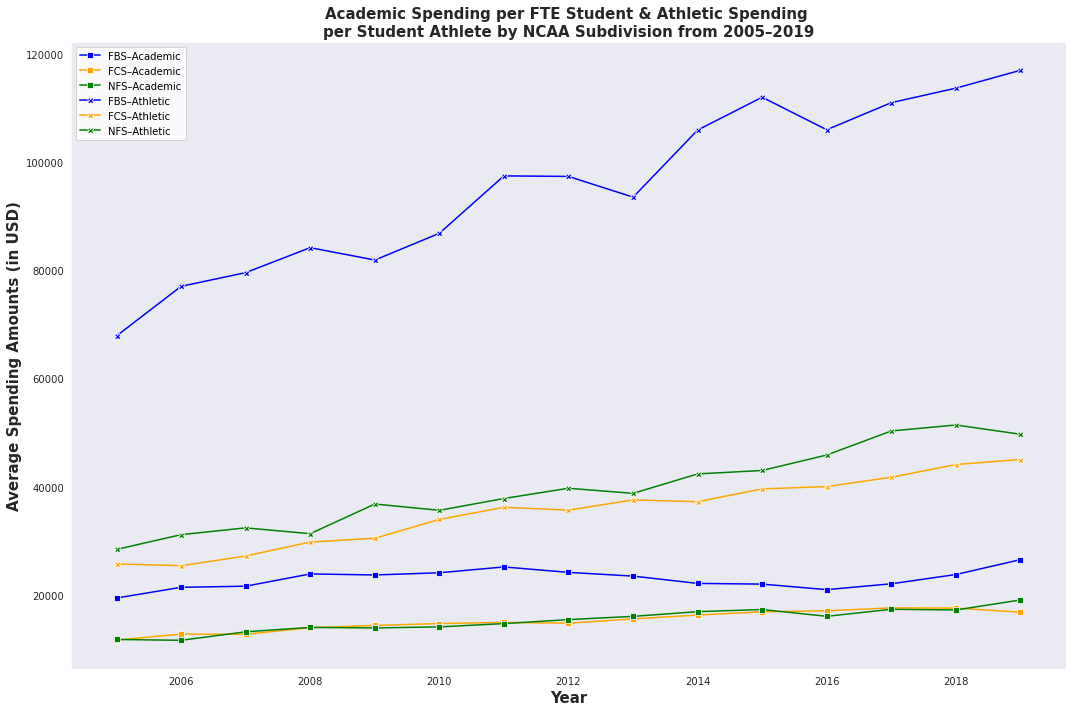

In [39]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(y = fbs_trends['Academic Spending per FTE Student'], x = fbs_trends.index, color='blue', marker = 's')
sns.lineplot(y = fcs_trends['Academic Spending per FTE Student'], x = fcs_trends.index, color='orange', marker = 's')
sns.lineplot(y = nfs_trends['Academic Spending per FTE Student'], x = nfs_trends.index, color='green', marker = 's')
sns.lineplot(y = fbs_trends['Athletic Spending per Student Athlete'], x = fbs_trends.index, color='blue', marker = 'X')
sns.lineplot(y = fcs_trends['Athletic Spending per Student Athlete'], x = fcs_trends.index, color='orange', marker = 'X')
sns.lineplot(y = nfs_trends['Athletic Spending per Student Athlete'], x = nfs_trends.index, color='green', marker = 'X')
ax.set_title('Academic Spending per FTE Student & Athletic Spending \nper Student Athlete by NCAA Subdivision from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Average Spending Amounts (in USD)', fontsize=15,fontweight='bold')
ax.legend(labels = ['FBS–Academic', 'FCS–Academic', 'NFS–Academic','FBS–Athletic', 'FCS–Athletic', 'NFS–Athletic'])
plt.tight_layout()
plt.savefig('Images/academic_athletic_spending_ncaa.png');

We can't do a similar football coach salary analysis like we did above given that the NFS does not have any data for this metric. However, we can plot average faculty salaries for each of the three NCAA subdivisions. Once again, we see that the FBS is at the top, followed by the NFS, and finally the FCS.

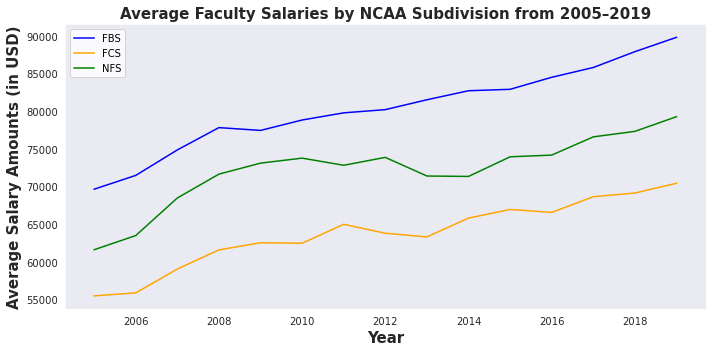

In [40]:
# Looking academic spending per FTE student vs. athletic spending per student athlete.
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(y = fbs_trends['Average Faculty Salary'], x = fbs_trends.index, color='blue')
sns.lineplot(y = fcs_trends['Average Faculty Salary'], x = fcs_trends.index, color='orange')
sns.lineplot(y = nfs_trends['Average Faculty Salary'], x = nfs_trends.index, color='green')
ax.set_title('Average Faculty Salaries by NCAA Subdivision from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Average Salary Amounts (in USD)', fontsize=15,fontweight='bold')
ax.legend(labels = ['FBS', 'FCS', 'NFS'])
plt.tight_layout()
plt.savefig('Images/salaries_ncaa.png');

---

# Modeling and Evaluation

As discussed above, [based on NCES data](https://nces.ed.gov/programs/coe/indicator/ctr) (used in IPEDS variables), the average retention rate is 81% for all institutions including all acceptance rates. Thus, I will use this as the dividing point for creating a binned variable.

In [41]:
# Creating binned target variable based on median for logistic regression
df['WRR_Binned'] = np.where(df['Weighted Retention Rate']>81.0, 1.0, 0.0)

Now I will create a train-test split for modeling purposes. The target will be the newly created binned weighted retention rate variable, which will be assigned to 'y'. On the other hand, 'X' will contain the other features used for modeling. There are several features created during the feature engineering section above that I wanted to keep for trend analysis, but now that we are moving on to modeling these will be dropped.

In [42]:
# Creating X (features) and y (target)
# Also dropping columns used in feature engineering.
X = df.drop(columns=['WRR_Binned', 'Weighted Retention Rate', 'UNITID', 'Institution Name'])
y = df['WRR_Binned']

# Creating a 10% holdout set for testing the final model
X_t, X_hold, y_t, y_hold = train_test_split(X, y, random_state=42, stratify=y, test_size=0.1)

# Split into 70% train, 30% test sets (less than 3/4 to combat overfitting)
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, random_state=42, stratify=y_t, test_size=20/90)

If we examine the distribution of values for our target variable in the training set, we can see that there is a class imbalance in favor of below average retention rates (0.0). About 78% of the values indicate below average retention rates with about 22% indicating above average retention rates. This imbalance is something to be aware of throughout the modeling process.

In [43]:
# Class imbalance in favor of schools that have less than average retention rates.
y_train.value_counts(normalize=True)

0.0    0.780454
1.0    0.219546
Name: WRR_Binned, dtype: float64

To make modeling more efficient, I will set up some pipelines. Thus, I will now group the remaining features based on data type.

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1707 to 1760
Data columns (total 34 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   Survey Year                                                            1453 non-null   datetime64[ns]
 1   Grand Total Revenue                                                    1453 non-null   int64         
 2   Grand Total Expenses                                                   1453 non-null   int64         
 3   NCAA Subdivision                                                       1453 non-null   object        
 4   FBS Conference                                                         1453 non-null   object        
 5   Other Expenses                                                         1453 non-null   float64       
 6   Medical                      

In [45]:
# Categorical columns
cat_cols = ['NCAA Subdivision', 'FBS Conference', 'Survey Year']

In [46]:
# Numerical columns
num_cols = ['Grand Total Revenue', 'Grand Total Expenses', 'Other Expenses', 'Medical', 
            'Competition Guarantees (Expenses)', 'Recruiting', 'Game Expenses and Travel', 
            'Facilities and Equipment', 'Coaches Compensation', 'Support and Admin Compensation w/Severance',
            'Athletic Student Aid', 'Other Revenue', 'Corporate Sponsorship, Advertising, Licensing', 
            'Donor Contributions', 'Competition Guarantees (Revenues)', 
            'NCAA/Conference Distributions, Media Rights, and Post-Season Football', 'Ticket Sales', 
            'Institutional/Government Support', 'Student Fees', 
            'Total Institutional/Government Support and Student Fees', 'Total Academic Spending (University-Wide)', 
            'Total Football Spending', 'Total Football Coaching Salaries', 'Athletics Related Debt',
            'Annual Debt Service, Leases and Rental Fees on Athletic Facilities', 'Average Faculty Salary', 
            'Average FB Coach Salary', 'Ratio of Athletic Spending vs. Academic Spending', 
            'Athletic Spending per Student Athlete', 'Academic Spending per FTE Student', 'Endowment']

In [47]:
# Categorical pipeline
cat_pipe = Pipeline([('ohe', OneHotEncoder())])

# Numeric pipeline
num_pipe = Pipeline([('min_max', MinMaxScaler())])

# Preprocessing pipeline, allow the untransformed columns to 'passthrough'
preprocessor = ColumnTransformer(transformers=[('categorical', cat_pipe, cat_cols),
                                               ('numerical', num_pipe, num_cols)],
                                 remainder='passthrough')

### Baseline Model

The predictor is set up to have 1.0 = schools with above average retention rates and 0.0 = below average retention rates.

True Positive: A school is identified as having above average retention rates and in fact does\
False Positive: A school is identified as having above average retention rates but in fact does not\
True Negative: A school is identified as having below average retention rates and in fact does\
False Negative: A school is identified as having below average retention rates but in fact does not

In this instance, I think false positives are more problematic than false negatives given that it is more of a problem to identify a school as above average when it is not. Thus, I will try and maximize precision scores throughout the modeling process.

A baseline model in this instance would , we will predict that a bird species is threatened at the base rate of ~13% found in the training data. This is how well our predictions would be if we knew nothing other than the proportion of threatened bird species.

Training Metrics
Accuracy: 0.664
Precision: 0.228
Recall: 0.223
f1: 0.225
----------
Testing Metrics
Accuracy: 0.668
Precision: 0.242
Recall: 0.242
f1: 0.242


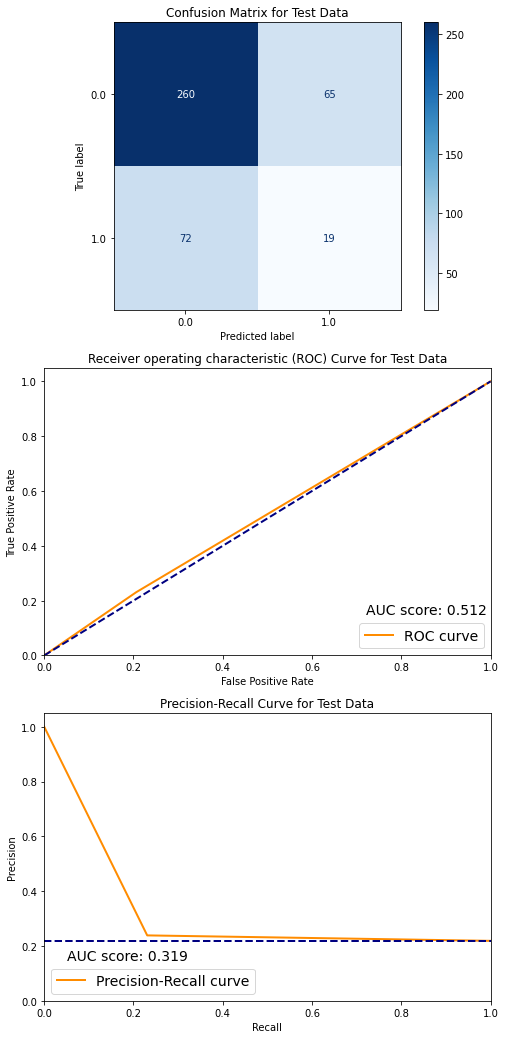

In [48]:
baseline = DummyClassifier(strategy='stratified')

# The results of this evaluation are not great, but this is also not unexpected for a baseline
evaluate(baseline, X_train, y_train, X_test, y_test)

### Logistic Regression

In [49]:
# Logistic regression pipeline
logr_pipe = Pipeline([('preprocessor', preprocessor),
                   ('logr', LogisticRegression(class_weight='balanced', random_state=42))])

# Scoring metrics to be used throughout modeling process
scoring_metrics = ('recall', 'precision', 'f1')

# Cross validation
logr_cv = cross_validate(logr_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(logr_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(logr_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(logr_cv['test_f1']):.3f}")

Mean Validation Recall: 0.812
Mean Validation Precision: 0.681
Mean Validation f1: 0.740


Training Metrics
Accuracy: 0.884
Precision: 0.696
Recall: 0.834
f1: 0.759
----------
Testing Metrics
Accuracy: 0.853
Precision: 0.644
Recall: 0.736
f1: 0.687


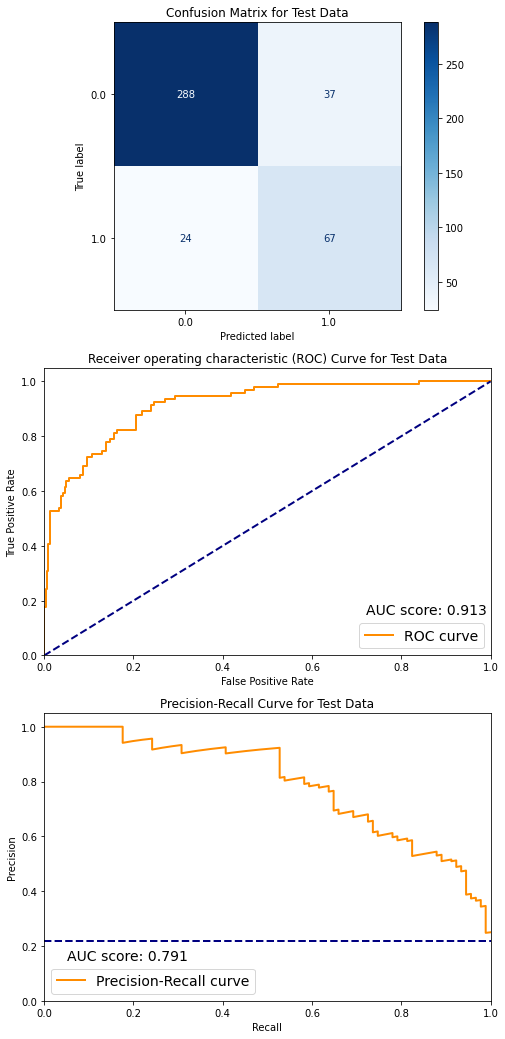

In [50]:
# Better than baseline, but recall scores are higher than precision which conflicts with the goals of this project.
evaluate(logr_pipe, X_train, y_train, X_test, y_test)

### KNN

In [51]:
# knn pipeline
knn_pipe = Pipeline([('preprocessor', preprocessor),
                   ('knn', KNeighborsClassifier())])

# cross validation
knn_cv = cross_validate(knn_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(knn_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(knn_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(knn_cv['test_f1']):.3f}")

Mean Validation Recall: 0.508
Mean Validation Precision: 0.808
Mean Validation f1: 0.621


Training Metrics
Accuracy: 0.897
Precision: 0.851
Recall: 0.646
f1: 0.734
----------
Testing Metrics
Accuracy: 0.858
Precision: 0.758
Recall: 0.516
f1: 0.614


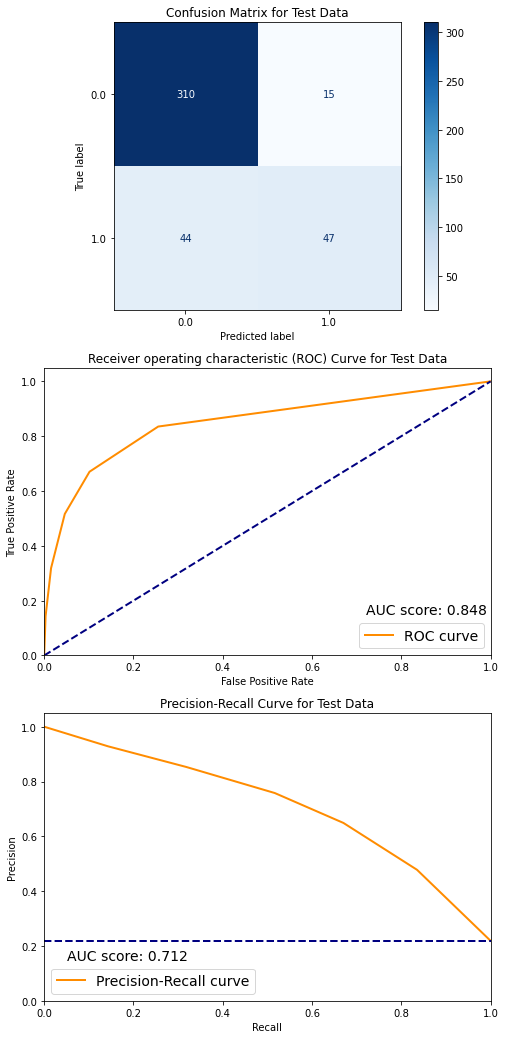

In [52]:
# Slightly overfit, but overall not too bad.
# Precision higher than recall which is what we are looking for.
evaluate(knn_pipe, X_train, y_train, X_test, y_test)

### Decision Tree

In [53]:
# Decision tree pipeline
dt_pipe = Pipeline([('preprocessor', preprocessor),
                   ('dt', DecisionTreeClassifier(random_state=42))])

# Cross validation
dt_cv = cross_validate(dt_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(dt_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(dt_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(dt_cv['test_f1']):.3f}")

Mean Validation Recall: 0.749
Mean Validation Precision: 0.740
Mean Validation f1: 0.745


Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.885
Precision: 0.736
Recall: 0.736
f1: 0.736


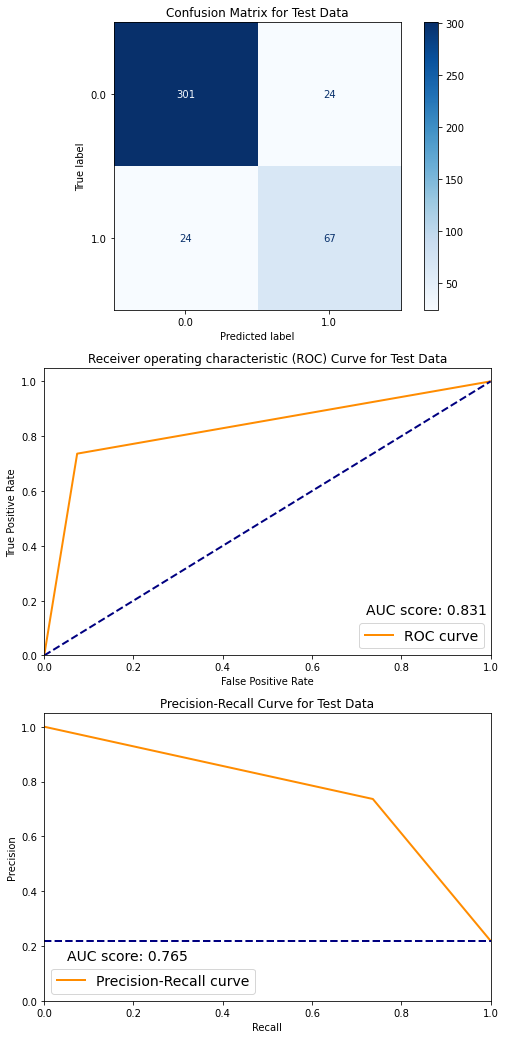

In [54]:
# Signs of overfitting, which is not surprising for a decision tree
evaluate(dt_pipe, X_train, y_train, X_test, y_test)

### Decision Tree Grid Search

In [55]:
# decision tree param grid
dt_grid = {'dt__max_depth': [3, 4, 5, 10],
          'dt__min_samples_leaf': [2, 5, 10, 20],
          'dt__criterion': ['gini', 'entropy'],
          'dt__class_weight': [None, 'balanced']}

dt_gs = GridSearchCV(estimator=dt_pipe, param_grid=dt_grid, scoring=scoring_metrics, refit='f1')

Training Metrics
Accuracy: 0.947
Precision: 0.876
Recall: 0.884
f1: 0.880
----------
Testing Metrics
Accuracy: 0.889
Precision: 0.732
Recall: 0.780
f1: 0.755

Best Parameters
{'dt__class_weight': None, 'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__class_weight,param_dt__criterion,param_dt__max_depth,param_dt__min_samples_leaf,params,split0_test_recall,...,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
30,0.024620,0.000828,0.006095,0.000260,None,entropy,10,10,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.703125,...,0.057868,13,0.762712,0.724409,0.762712,0.677419,0.763359,0.738122,0.033820,1
8,0.020895,0.001270,0.006295,0.000229,None,gini,5,2,"{'dt__class_weight': None, 'dt__criterion': 'g...",0.828125,...,0.040164,12,0.773723,0.707965,0.739496,0.699187,0.733333,0.730741,0.026250,2
28,0.027232,0.001317,0.005958,0.000240,None,entropy,10,2,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.640625,...,0.056096,16,0.700855,0.753846,0.793388,0.688000,0.712121,0.729642,0.038779,3
9,0.020527,0.000666,0.007066,0.001109,None,gini,5,5,"{'dt__class_weight': None, 'dt__criterion': 'g...",0.812500,...,0.037564,6,0.764706,0.685185,0.711864,0.754098,0.722689,0.727709,0.028809,4
29,0.025754,0.000753,0.006048,0.000162,None,entropy,10,5,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.734375,...,0.025033,28,0.740157,0.791045,0.655738,0.693548,0.738462,0.723790,0.045939,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.021129,0.000945,0.006040,0.000193,balanced,entropy,4,20,"{'dt__class_weight': 'balanced', 'dt__criterio...",0.812500,...,0.047801,64,0.662420,0.698630,0.650307,0.642857,0.627027,0.656248,0.024095,60
16,0.019204,0.001495,0.006045,0.000298,None,entropy,3,2,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.500000,...,0.052132,20,0.571429,0.690909,0.704000,0.672269,0.618182,0.651358,0.049522,61
17,0.018142,0.000335,0.005988,0.000199,None,entropy,3,5,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.500000,...,0.052132,20,0.571429,0.690909,0.704000,0.672269,0.618182,0.651358,0.049522,61
18,0.018412,0.000384,0.006087,0.000272,None,entropy,3,10,"{'dt__class_weight': None, 'dt__criterion': 'e...",0.500000,...,0.052132,20,0.571429,0.690909,0.704000,0.672269,0.618182,0.651358,0.049522,61


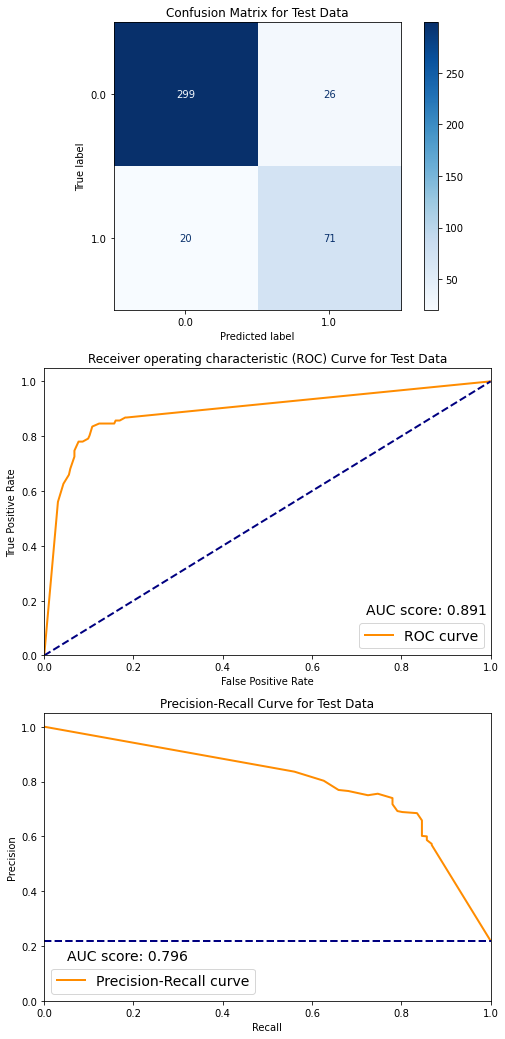

In [56]:
# Still overfit, but somewhat improved
dt_gs_model = evaluate(dt_gs, X_train, y_train, X_test, y_test, grid_search=True)

### Gradient Boost

In [57]:
# gradient boosting pipeline
gb_pipe = Pipeline([('preprocessor', preprocessor),
                   ('gb', GradientBoostingClassifier(learning_rate=0.01,
                                                     max_depth=10,
                                                     min_samples_leaf=10,
                                                     n_estimators=1000,
                                                     random_state=42))])

# cross validation
gb_cv = cross_validate(gb_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(gb_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(gb_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(gb_cv['test_f1']):.3f}")

Mean Validation Recall: 0.793
Mean Validation Precision: 0.898
Mean Validation f1: 0.842


Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.933
Precision: 0.880
Recall: 0.802
f1: 0.839


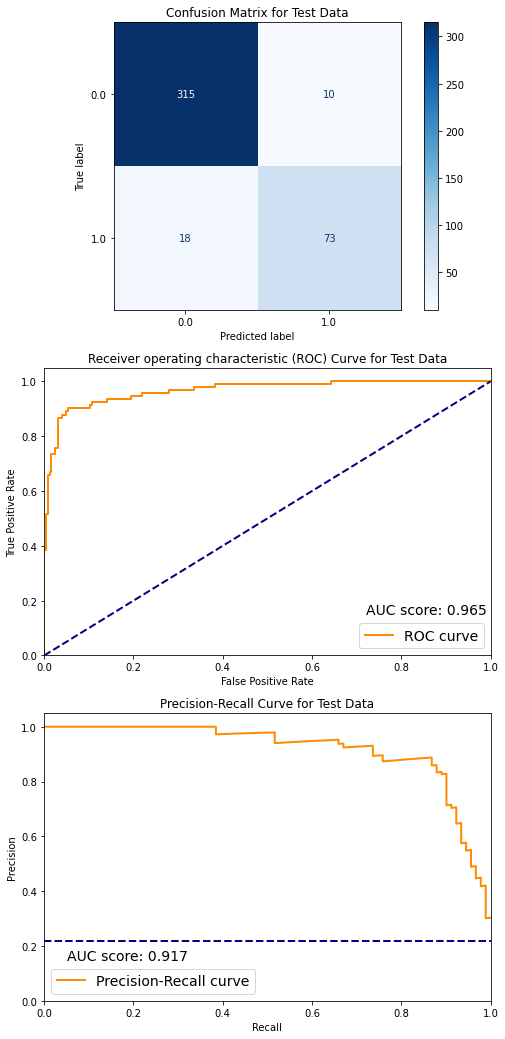

In [58]:
# Precision is higher than recall, but this seems to be rather overfit.
evaluate(gb_pipe, X_train, y_train, X_test, y_test)

### Random Forest

In [59]:
# Decision tree pipeline
rf_pipe = Pipeline([('preprocessor', preprocessor),
                   ('rf', RandomForestClassifier(random_state=42))])

# Cross validation
rf_cv = cross_validate(rf_pipe, X_train, y_train, scoring=scoring_metrics)

print(f"Mean Validation Recall: {np.mean(rf_cv['test_recall']):.3f}")
print(f"Mean Validation Precision: {np.mean(rf_cv['test_precision']):.3f}")
print(f"Mean Validation f1: {np.mean(rf_cv['test_f1']):.3f}")

Mean Validation Recall: 0.755
Mean Validation Precision: 0.896
Mean Validation f1: 0.819


Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.921
Precision: 0.892
Recall: 0.725
f1: 0.800


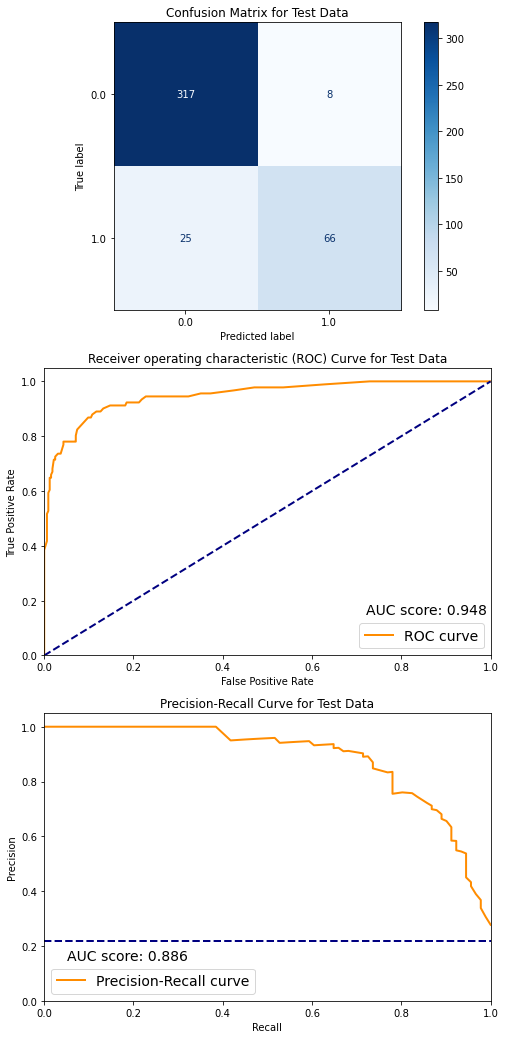

In [60]:
# Still overfit, but performing better than the original decision trees.
evaluate(rf_pipe, X_train, y_train, X_test, y_test)

### Random Forest Grid Search

In [61]:
rf_grid = {
    'rf__min_samples_split': [3, 5, 10], 
    'rf__n_estimators' : [100, 300],
    'rf__max_depth': [3, 5, 15, 25],
    'rf__max_features': [3, 5, 10, 20]
}

rf_gs = GridSearchCV(estimator=rf_pipe, param_grid=rf_grid, scoring=scoring_metrics, refit='f1')

Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.916
Precision: 0.868
Recall: 0.725
f1: 0.790

Best Parameters
{'rf__max_depth': 25, 'rf__max_features': 20, 'rf__min_samples_split': 3, 'rf__n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_recall,...,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
90,0.485448,0.007494,0.014442,0.000478,25,20,3,100,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.796875,...,0.007763,9,0.842975,0.806723,0.803419,0.820513,0.833333,0.821393,0.015149,1
69,1.436327,0.018536,0.030643,0.001144,15,20,5,300,"{'rf__max_depth': 15, 'rf__max_features': 20, ...",0.796875,...,0.014849,10,0.842975,0.806723,0.796610,0.810345,0.850000,0.821331,0.021145,2
63,0.852147,0.010046,0.030076,0.000172,15,10,5,300,"{'rf__max_depth': 15, 'rf__max_features': 10, ...",0.781250,...,0.025016,1,0.847458,0.779661,0.830508,0.807018,0.840336,0.820996,0.024774,3
93,1.430718,0.022464,0.030039,0.000273,25,20,5,300,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.796875,...,0.019138,15,0.842975,0.806723,0.789916,0.810345,0.850000,0.819992,0.022814,4
68,0.484879,0.006455,0.014128,0.000191,15,20,5,100,"{'rf__max_depth': 15, 'rf__max_features': 20, ...",0.796875,...,0.011348,5,0.842975,0.806723,0.803419,0.810345,0.830508,0.818794,0.015333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.128719,0.007935,0.013192,0.000277,3,3,3,100,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.060959,94,0.555556,0.605505,0.555556,0.603774,0.577320,0.579542,0.021986,91
3,0.358363,0.004708,0.028144,0.001531,3,3,5,300,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.065732,91,0.560748,0.600000,0.542056,0.594059,0.591837,0.577740,0.022462,93
4,0.125664,0.003488,0.013721,0.000564,3,3,10,100,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.065641,96,0.555556,0.605505,0.537037,0.603774,0.577320,0.575838,0.026757,94
5,0.359969,0.008206,0.040161,0.025910,3,3,10,300,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.066060,93,0.560748,0.600000,0.528302,0.594059,0.577320,0.572086,0.025826,95


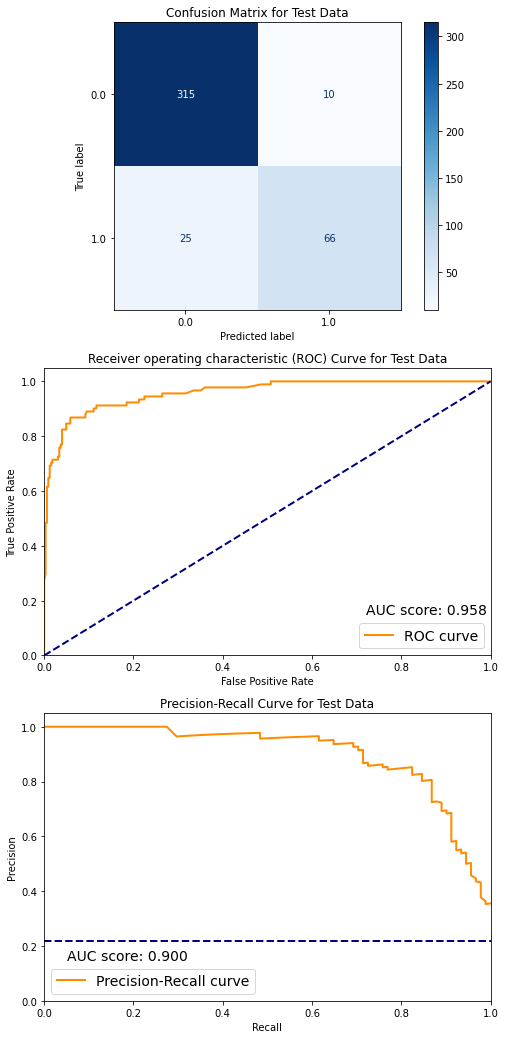

In [62]:
# Still overfit, but improved from RF model above.
rf_gs_model = evaluate(rf_gs, X_train, y_train, X_test, y_test, grid_search=True)

I also experiemtned with different types of stacked models, but opted not to include these results in the final notebook given that the results were not significantly better than any of the individual model types above. If you are interested in the results of these models, you can find those results in the [EDA Notebooks folder in this repository](https://github.com/Shoemaker703/college_retention/tree/main/EDA%20Notebooks).

### Final Model

Given that I am trying to maximize precision, I opted to select the random forest grid search model as my final model. While there are some signs of overfitting, I think the cross validation scores—in particular the precision score of .896—indicate that this model will still perform reasonably well against unseen data. The precision score on the testing data was .868, so the last step was to test this model on the holdout data. The precision score on the holdout test was .927. The model might still be overfit, but the high precision score on the holdout data seems promising. 

Training Metrics
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
f1: 1.000
----------
Testing Metrics
Accuracy: 0.947
Precision: 0.927
Recall: 0.826
f1: 0.874

Best Parameters
{'rf__max_depth': 25, 'rf__max_features': 20, 'rf__min_samples_split': 3, 'rf__n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_recall,...,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
90,0.481038,0.003069,0.014592,0.000860,25,20,3,100,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.796875,...,0.007763,9,0.842975,0.806723,0.803419,0.820513,0.833333,0.821393,0.015149,1
69,1.442997,0.019966,0.031519,0.002669,15,20,5,300,"{'rf__max_depth': 15, 'rf__max_features': 20, ...",0.796875,...,0.014849,10,0.842975,0.806723,0.796610,0.810345,0.850000,0.821331,0.021145,2
63,0.865253,0.008349,0.030689,0.001397,15,10,5,300,"{'rf__max_depth': 15, 'rf__max_features': 10, ...",0.781250,...,0.025016,1,0.847458,0.779661,0.830508,0.807018,0.840336,0.820996,0.024774,3
93,1.434689,0.019625,0.029777,0.000336,25,20,5,300,"{'rf__max_depth': 25, 'rf__max_features': 20, ...",0.796875,...,0.019138,15,0.842975,0.806723,0.789916,0.810345,0.850000,0.819992,0.022814,4
68,0.484147,0.009842,0.014115,0.000173,15,20,5,100,"{'rf__max_depth': 15, 'rf__max_features': 20, ...",0.796875,...,0.011348,5,0.842975,0.806723,0.803419,0.810345,0.830508,0.818794,0.015333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.132773,0.007838,0.013439,0.000479,3,3,3,100,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.060959,94,0.555556,0.605505,0.555556,0.603774,0.577320,0.579542,0.021986,91
3,0.358690,0.003407,0.027094,0.000380,3,3,5,300,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.065732,91,0.560748,0.600000,0.542056,0.594059,0.591837,0.577740,0.022462,93
4,0.123084,0.000439,0.013105,0.000269,3,3,10,100,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.065641,96,0.555556,0.605505,0.537037,0.603774,0.577320,0.575838,0.026757,94
5,0.362037,0.011567,0.027772,0.001504,3,3,10,300,"{'rf__max_depth': 3, 'rf__max_features': 3, 'r...",0.468750,...,0.066060,93,0.560748,0.600000,0.528302,0.594059,0.577320,0.572086,0.025826,95


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['NCAA '
                                                                          'Subdivision',
                                                                          'FBS '
                                                                          'Conference',
                                                                          'Survey '
                                                                          'Year']),
                                                          

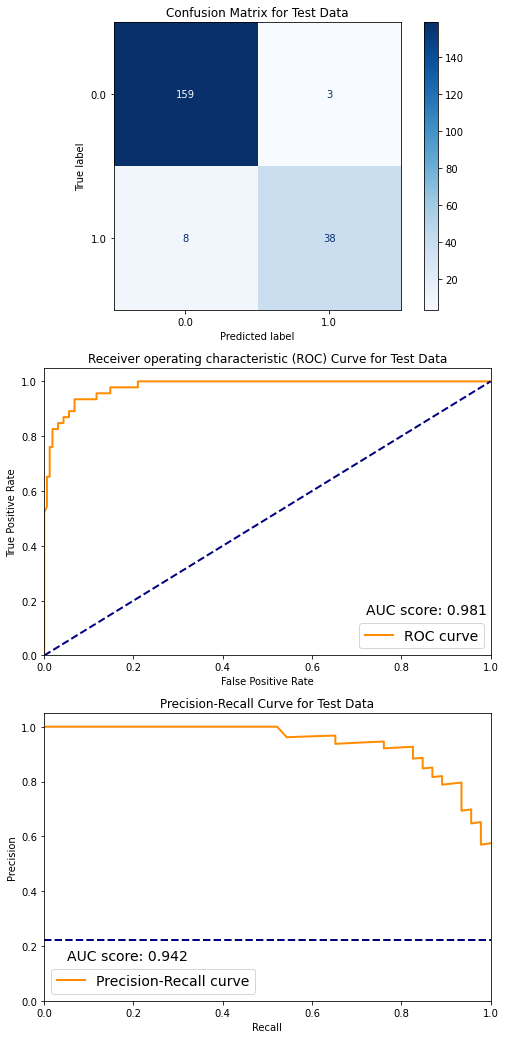

In [63]:
evaluate(rf_gs, X_train, y_train, X_hold, y_hold, grid_search=True)

### Feature Importance

Now that I have evaluated the final model, it is time to determine the relative feature importances. As we can see, the most significant features in this model are "Average Faculty Salary" and 'Total Academic Spending (University-Wide)', which account for 13.5% and 8.8% of the value of features in this model, respectively. 

In [64]:
# Creating an array of feature importance values for the random forest
feature_importance_values = rf_gs_model.best_estimator_[1].feature_importances_

# Retrieving feature names from OHE features
ohe_cols = rf_gs_model.best_estimator_['preprocessor'].transformers_[0][1]['ohe'].get_feature_names()

# Preprocessor features are in order of the pipeline steps
feature_cols = [*ohe_cols, *num_cols]

# create DataFrame with feature names and importance
feature_df = pd.DataFrame.from_dict(dict(zip(feature_cols, feature_importance_values)),
                                    orient='index',
                                    columns=['feature importance'])

In [65]:
# Sorting features based on importance
sorted_features = feature_df.sort_values('feature importance', ascending=False).head(10)
sorted_features

,feature importance
Average Faculty Salary,0.212298
Total Academic Spending (University-Wide),0.097005
Grand Total Expenses,0.037741
Total Football Spending,0.037218
Student Fees,0.036736
Academic Spending per FTE Student,0.033973
Ratio of Athletic Spending vs. Academic Spending,0.031899
"NCAA/Conference Distributions, Media Rights, and Post-Season Football",0.031792
Game Expenses and Travel,0.031544
Support and Admin Compensation w/Severance,0.029871


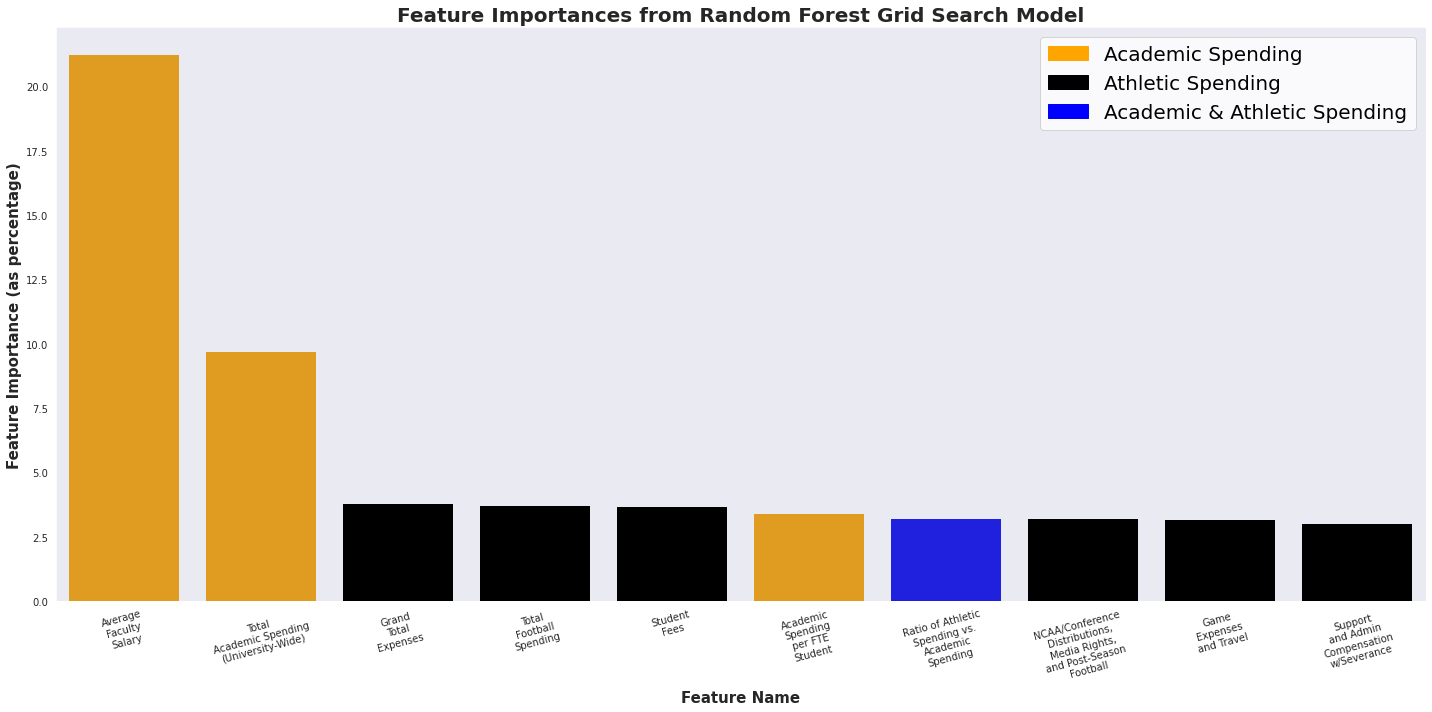

In [66]:
# Creating a bar graph to visualize relative feature importances
labels = ['Average\nFaculty\nSalary', 'Total\nAcademic Spending\n(University-Wide)', 'Grand\nTotal\nExpenses',
          'Total\nFootball\nSpending', 'Student\nFees', 'Academic\nSpending\nper FTE\nStudent',
          'Ratio of Athletic\nSpending vs.\nAcademic\nSpending', 
          'NCAA/Conference\nDistributions,\nMedia Rights,\nand Post-Season\nFootball',
          'Game\nExpenses\nand Travel', 'Support\nand Admin\nCompensation\nw/Severance']

colors = ['orange', 'orange', 'black', 'black', 'black', 'orange', 'blue', 'black', 'black', 'black']

with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = sorted_features['feature importance']*100, x = sorted_features.index, palette=colors)
ax.set_title('Feature Importances from Random Forest Grid Search Model', fontsize=20, fontweight='bold')
ax.set_xlabel('Feature Name', fontsize=15, fontweight='bold')
ax.set_ylabel('Feature Importance (as percentage)', fontsize=15, fontweight='bold')
ax.set_xticklabels(labels = labels, rotation = 15)
orange_patch = mpatches.Patch(color='orange', label='Academic Spending')
black_patch = mpatches.Patch(color='black', label='Athletic Spending')
blue_patch = mpatches.Patch(color='blue', label='Academic & Athletic Spending')
ax.legend(handles=[orange_patch, black_patch, blue_patch], prop={'size': 20})
plt.tight_layout()
plt.savefig('Images/feature_importances.png');

Here is a list of these ten features, including the source of the data and a brief definition of what the data represents.

- Average Faculty Salary: 
    - IPEDS
    - Average of all faculty salaries at a given institution
- Total Academic Spending (University-Wide): 
    - Knight Commission
    - Total expenditures for the direct role and mission activities of an institution. It includes functional classifications of expenditures for instruction, research, public service, academic support, student services, institutional support, scholarships and fellowships, and operations and maintenance.
- Grand Total Expenses:
    - EADA
    - All expenses attributable to intercollegiate athletic activities. This includes appearance guarantees and options, athletically related student aid, contract services, equipment, fundraising activities, operating expenses, promotional activities, recruiting expenses, salaries and benefits, supplies, travel, and any other expenses attributable to intercollegiate athletic activities.
- Total Football Spending:
    - Knight Commission
    - Total football operating expenses, including the cost of athletics student aid.    
- Student Fees:
    - Knight Commission
    - Fees paid by student and allocated for the restricted use of the athletics department.
- Academic Spending per FTE Student:
    - Feature Engineered Column
    - Total Academic Spending/Total number of enrolled students
- Ratio of Athletic Spending vs. Academic Spending
    - Feature Engineered Column
    - Athletic Spending per Student Athlete/Academic Spending per FTE Student
- NCAA/Conference Distributions, Media Rights, and Post-Season Football
    - Knight Commission
    - Revenue received from the NCAA (including championships) and athletics conferences, media rights, and post-season football bowl games.
- Game Expenses and Travel:
    - Knight Commission
    - Game expenses relate to competition expenses other than travel. Travel relates to spending on transportation, lodging, meals, and incidentals related to preseason, regular season, and post-season competition.
- Support and Admin Compensation w/ Severance:
    - Knight Commission
    - Support and administrative staff compensation includes bonuses and benefits paid to all administrative and support staff. This category includes direct payment from the institution and payment from a third party. Severance payments for former coaches and administrators are also included.

Of these top 10 feature importances, we can see that 3 of them are more related to academic spending, 5 are more related to athletic spending, and 1 is a combination of the two:
<br>
<br>
**Academic:** 'Average Faculty Salary', 'Total Academic Spending (University-Wide)', 'Academic Spending per FTE Student'.
<br>
**Athletic:** 'Grand Total Expenses', 'Total Football Spending', 'Student Fees', 'NCAA/Conference Distributions, Media Rights, and Post-Season Football', 'Game Expenses and Travel', 'Support and Admin Compensation w/ Severance'.
<br>
**Combination:** 'Ratio of Athletic Spending vs. Academic Spending'.
<br>
<br>
If we then add up the relative feature importances provided by above, we can see that the total importance of the academic features outweighs the athletic features, even though there are two fewer in this list:
<br>
<br>
**Academic** = 34.3%
<br>
**Athletic** = 20.5%
<br>
**Combination** = 3.2%
<br>
<br>
If we look at the features used in the training data, there are 34 total features, only 4 of them are clearly related to academic spending ('Total Academic Spending (University-Wide)', 'Average Faculty Salary', 'Endowment', 'Academic Spending per FTE Student'). The fact that 3 of these 4 features are in the top 6 most important features in the random forest model reinforces the idea that academic spending is more important to student retention rates than athletic spending. 
<br>
<br>
While it might not be surprising that academic spending patterns are more important for student retention rates than athletic spending, if we examine the metrics below, we can see that universities have been increasing athletic spending at a greater rate than academic spending over the course of the 15 years included in this data:

In [67]:
print(f"Median Faculty Salary:        ${round(df['Average Faculty Salary'].median())}")
print(f"Median Football Coach Salary: ${round(df['Average FB Coach Salary'].median())}")
print(" ")
print(f"Faculty Salary Rate of Increase from 2005–2019:  {round(((trends['Average Faculty Salary'][-1] - trends['Average Faculty Salary'][0])/trends['Average Faculty Salary'][0])*100,1)}%")
print(f"Coaching Salary Rate of Increase from 2005–2019: {round(((trends['Average FB Coach Salary'][-1] - trends['Average FB Coach Salary'][0])/trends['Average FB Coach Salary'][0])*100,1)}%")

Median Faculty Salary:        $71419
Median Football Coach Salary: $92087
 
Faculty Salary Rate of Increase from 2005–2019:  33.6%
Coaching Salary Rate of Increase from 2005–2019: 158.2%


In [68]:
print(f"Academic Spending per FTE Student Rate of Increase from 2005–2019:     {round(((trends['Academic Spending per FTE Student'][-1] - trends['Academic Spending per FTE Student'][0])/trends['Academic Spending per FTE Student'][0])*100,1)}%")
print(f"Athletic Spending per Student Athlete Rate of Increase from 2005–2019: {round(((trends['Athletic Spending per Student Athlete'][-1] - trends['Athletic Spending per Student Athlete'][0])/trends['Athletic Spending per Student Athlete'][0])*100,1)}%")

Academic Spending per FTE Student Rate of Increase from 2005–2019:     52.8%
Athletic Spending per Student Athlete Rate of Increase from 2005–2019: 84.8%


In [69]:
print(f"Academic Spending Rate of Increase from 2005–2019: {round(((trends['Total Academic Spending (University-Wide)'][-1] - trends['Total Academic Spending (University-Wide)'][0])/trends['Total Academic Spending (University-Wide)'][0])*100,1)}%")
print(f"Athletic Spending Rate of Increase from 2005–2019: {round(((trends['Grand Total Expenses'][-1] - trends['Grand Total Expenses'][0])/trends['Grand Total Expenses'][0])*100,1)}%")

Academic Spending Rate of Increase from 2005–2019: 72.5%
Athletic Spending Rate of Increase from 2005–2019: 131.5%


### Looking at predictions to determine NCAA Subdivison information

In [70]:
# Creating a dataframe of the predictions from the random forest model
df_preds = pd.DataFrame(rf_gs_model.predict(df), index=df.index, columns=['prediction'])

# create DataFrame to inspect predictions
df_preds = pd.concat([df.loc[df.index, ['UNITID', 'Institution Name', 'Survey Year', 'FBS Conference', 
                                        'NCAA Subdivision', 'Average Faculty Salary', 'Average FB Coach Salary',
                                        'Academic Spending per FTE Student', 
                                        'Athletic Spending per Student Athlete']], df_preds], axis=1)

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [71]:
# Splitting the prediction df into above and below average retention rates to get more specific school/conference info
above_average_preds = df_preds[df_preds['prediction']==1.0]
below_average_preds = df_preds[df_preds['prediction']==0.0]

Based on the random forest model predictions, we can see that the FBS has the most representation in the "above average predictions", while the FCS has the most representation in the "below average predictions".

In [72]:
above_average_preds['NCAA Subdivision'].value_counts(normalize=True)

Football Bowl Subdivision            0.662844
No Football Subdivision              0.176606
Football Championship Subdivision    0.160550
Name: NCAA Subdivision, dtype: float64

In [73]:
below_average_preds['NCAA Subdivision'].value_counts(normalize=True)

Football Championship Subdivision    0.460695
Football Bowl Subdivision            0.338818
No Football Subdivision              0.200488
Name: NCAA Subdivision, dtype: float64

If we just want to focus on which FBS conferences do the best, we will have to temporarily ignore the 'N/A' values given that these represent schools not in the FBS. As we can see, the so-called "power 5 conferences" (Big 10, ACC, SEC, PAC-12, and Big 12) are all at the top of the above average predictions. On the other hand, 4 of the so-called "group of 5 conferences" (C-USA, MW, Sun Belt, and MAC) are at the top of the below average predictions.

In [74]:
above_average_preds['FBS Conference'].value_counts(normalize=True)

N/A                             0.337156
Big Ten Conference              0.153670
Atlantic Coast Conference       0.142202
Southeastern Conference         0.116972
Pacific-12 Conference           0.075688
Big 12 Conference               0.064220
American Athletic Conference    0.029817
Mountain West Conference        0.025229
Big East Conference             0.022936
Conference USA                  0.020642
Sun Belt Conference             0.006881
Western Athletic Conference     0.004587
Name: FBS Conference, dtype: float64

In [75]:
below_average_preds['FBS Conference'].value_counts(normalize=True)

N/A                             0.661182
Conference USA                  0.073736
Mountain West Conference        0.046923
Sun Belt Conference             0.043876
Mid-American Conference         0.039001
Western Athletic Conference     0.030469
Big 12 Conference               0.026204
Southeastern Conference         0.026204
Pacific-12 Conference           0.023766
American Athletic Conference    0.010360
Big East Conference             0.007922
Atlantic Coast Conference       0.007313
Big Ten Conference              0.003047
Name: FBS Conference, dtype: float64

We can also see that these schools predicted to be below average have a lower median faculty salary than their above average counterparts:

In [76]:
print(f"Above Average Schools Average Faculty Salary: ${round(above_average_preds['Average Faculty Salary'].median())}")
print(f"Below Average Schools Average Faculty Salary: ${round(below_average_preds['Average Faculty Salary'].median())}")

Above Average Schools Average Faculty Salary: $91176
Below Average Schools Average Faculty Salary: $68208


Given that schools have a large variance in overall budget size, using an average like academic spending per FTE student will be a more reliable metric for comparing above and below average schools than total academic spending (university-wide). As we can see, above average schools spend more on academics per FTE student:

In [77]:
print(f"Above Average Schools Academic Spending per FTE Student: ${round(above_average_preds['Academic Spending per FTE Student'].median())}")
print(f"Below Average Schools Academic Spending per FTE Student: ${round(below_average_preds['Academic Spending per FTE Student'].median())}")

Above Average Schools Academic Spending per FTE Student: $30106
Below Average Schools Academic Spending per FTE Student: $15573


However, we can also see that above average schools tend to spend more money on student athletes and average football coaching salaries as well. This likely has something to do with a correlation between all spending metrics and overall budget size, and as might be apparent, the more money a school has the better they often are at retaining students.

In [78]:
print(f"Above Average Schools Average Football Coach Salary: ${round(above_average_preds['Average FB Coach Salary'].median())}")
print(f"Below Average Schools Average Football Coach Salary: ${round(below_average_preds['Average FB Coach Salary'].median())}")

Above Average Schools Average Football Coach Salary: $342007
Below Average Schools Average Football Coach Salary: $82497


In [79]:
print(f"Above Average Schools Athletic Spending per Student Athlete: ${round(above_average_preds['Athletic Spending per Student Athlete'].median())}")
print(f"Below Average Schools Athletic Spending per Student Athlete: ${round(below_average_preds['Athletic Spending per Student Athlete'].median())}")

Above Average Schools Athletic Spending per Student Athlete: $101395
Below Average Schools Athletic Spending per Student Athlete: $44470


Now we can also create some trend data frames to visualize spending patterns over the 15 years in the data set for schools with predicted above and below average retention rates.

In [80]:
# Setting date time object as the index
above_average_preds = above_average_preds.set_index('Survey Year')
below_average_preds = below_average_preds.set_index('Survey Year')

# Using groupby to create medians for evey numerical column in the dataframe
above_avg_pred_trends = above_average_preds.groupby('Survey Year').median()
below_avg_pred_trends = below_average_preds.groupby('Survey Year').median()

This graph demonstrates that the highest spending amounts and the greatest increase is with athletic spending per student athlete at above average schools. We can also see that even below average schools on average spend more on student athletes than above average schools spend on academic students.

Futhermore, we can see that athletic spending per student athlete has increased at a greater rate (75.2% & 63.7%) than academic spending per FTE student (29.0% & 39.4%) for both above and below average schools.

Athletic Spending per Student Athlete Rate of Increase at Above Average Schools from 2005–2019: 75.2%
Athletic Spending per Student Athlete Rate of Increase at Below Average Schools from 2005–2019: 63.7%
Academic Spending per FTE Student Rate of Increase at Above Average Schools from 2005–2019:     38.9%
Academic Spending per FTE Student Rate of Increase at Below Average Schools from 2005–2019:     43.7%


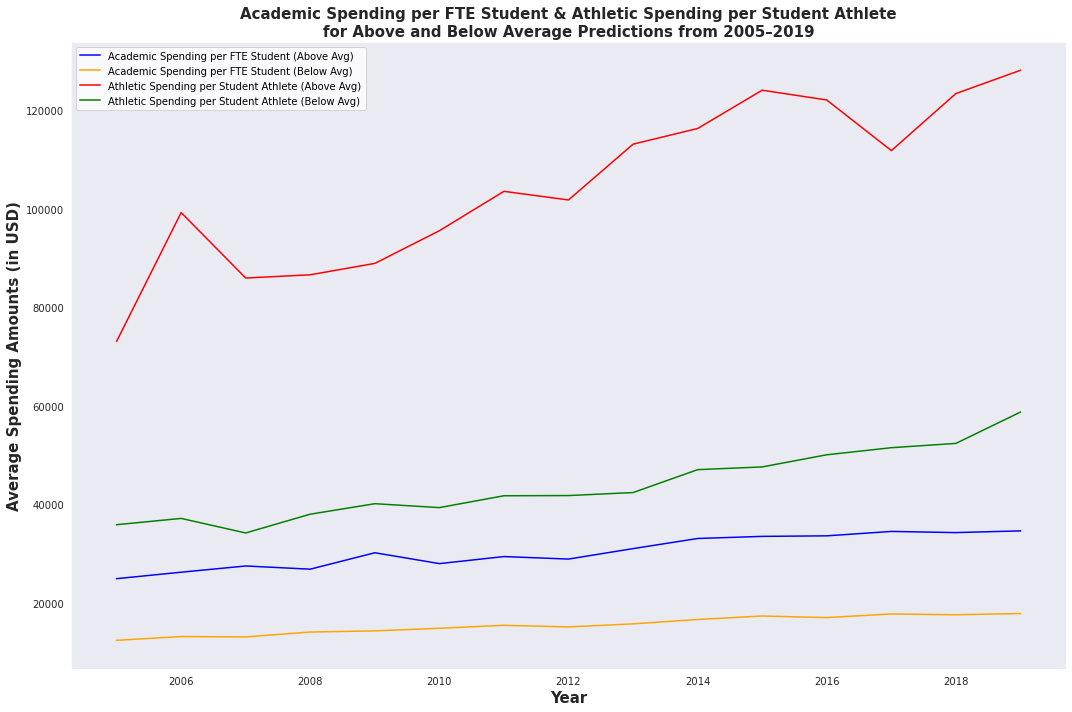

In [81]:
# Looking academic spending per FTE student vs. athletic spending per student athlete at above and below average schools.
print(f"Athletic Spending per Student Athlete Rate of Increase at Above Average Schools from 2005–2019: {round(((above_avg_pred_trends['Athletic Spending per Student Athlete'][-1] - above_avg_pred_trends['Athletic Spending per Student Athlete'][0])/above_avg_pred_trends['Athletic Spending per Student Athlete'][0])*100,1)}%")
print(f"Athletic Spending per Student Athlete Rate of Increase at Below Average Schools from 2005–2019: {round(((below_avg_pred_trends['Athletic Spending per Student Athlete'][-1] - below_avg_pred_trends['Athletic Spending per Student Athlete'][0])/below_avg_pred_trends['Athletic Spending per Student Athlete'][0])*100,1)}%")
print(f"Academic Spending per FTE Student Rate of Increase at Above Average Schools from 2005–2019:     {round(((above_avg_pred_trends['Academic Spending per FTE Student'][-1] - above_avg_pred_trends['Academic Spending per FTE Student'][0])/above_avg_pred_trends['Academic Spending per FTE Student'][0])*100,1)}%")
print(f"Academic Spending per FTE Student Rate of Increase at Below Average Schools from 2005–2019:     {round(((below_avg_pred_trends['Academic Spending per FTE Student'][-1] - below_avg_pred_trends['Academic Spending per FTE Student'][0])/below_avg_pred_trends['Academic Spending per FTE Student'][0])*100,1)}%")


with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(y = above_avg_pred_trends['Academic Spending per FTE Student'], x = above_avg_pred_trends.index, color='blue')
sns.lineplot(y = below_avg_pred_trends['Academic Spending per FTE Student'], x = below_avg_pred_trends.index, color='orange')
sns.lineplot(y = above_avg_pred_trends['Athletic Spending per Student Athlete'], x = above_avg_pred_trends.index, color='red')
sns.lineplot(y = below_avg_pred_trends['Athletic Spending per Student Athlete'], x = below_avg_pred_trends.index, color='green')
ax.set_title('Academic Spending per FTE Student & Athletic Spending per Student Athlete\nfor Above and Below Average Predictions from 2005–2019', 
             fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Average Spending Amounts (in USD)', fontsize=15,fontweight='bold')
ax.legend(labels = ['Academic Spending per FTE Student (Above Avg)', 'Academic Spending per FTE Student (Below Avg)',
                    'Athletic Spending per Student Athlete (Above Avg)', 'Athletic Spending per Student Athlete (Below Avg)'],
         loc='upper left')
plt.tight_layout()
plt.savefig('Images/academic_athletic_spending_avg_trends.png');

This graph demonstrates that the highest spending amounts and the greatest increase is with football coach salaries at above average schools (171.8% increase). While the amount that below average schools spend on football coach salaries is relatively similar to faculty salaries, the rate of increase is much higher on average (95.5% vs. 22.9% and 26.3%).

Football Coach Salary Rate of Increase at Above Average Schools from 2005–2019: 190.0%
Football Coach Salary Rate of Increase at Below Average Schools from 2005–2019: 95.5%
Faculty Salary Rate of Increase at Above Average Schools from 2005–2019:        22.9%
Faculty Salary Rate of Increase at Below Average Schools from 2005–2019:        26.3%


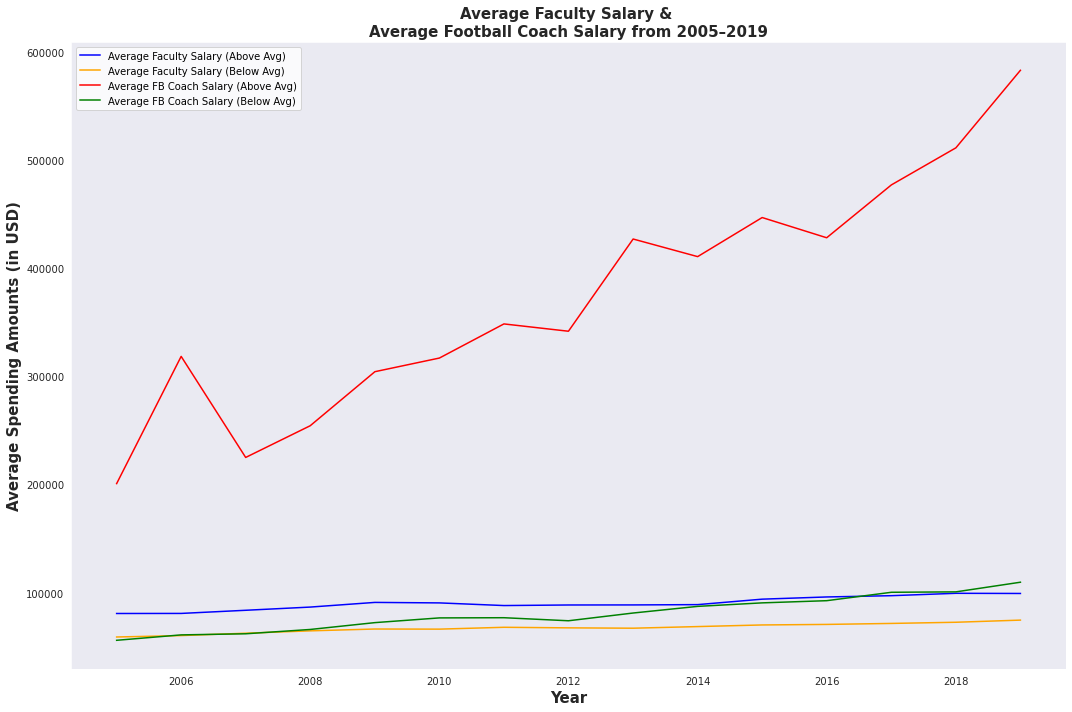

In [82]:
# Looking at average faculty salaries vs. average football coach salaries at above and below average schools.

print(f"Football Coach Salary Rate of Increase at Above Average Schools from 2005–2019: {round(((above_avg_pred_trends['Average FB Coach Salary'][-1] - above_avg_pred_trends['Average FB Coach Salary'][0])/above_avg_pred_trends['Average FB Coach Salary'][0])*100,1)}%")
print(f"Football Coach Salary Rate of Increase at Below Average Schools from 2005–2019: {round(((below_avg_pred_trends['Average FB Coach Salary'][-1] - below_avg_pred_trends['Average FB Coach Salary'][0])/below_avg_pred_trends['Average FB Coach Salary'][0])*100,1)}%")
print(f"Faculty Salary Rate of Increase at Above Average Schools from 2005–2019:        {round(((above_avg_pred_trends['Average Faculty Salary'][-1] - above_avg_pred_trends['Average Faculty Salary'][0])/above_avg_pred_trends['Average Faculty Salary'][0])*100,1)}%")
print(f"Faculty Salary Rate of Increase at Below Average Schools from 2005–2019:        {round(((below_avg_pred_trends['Average Faculty Salary'][-1] - below_avg_pred_trends['Average Faculty Salary'][0])/below_avg_pred_trends['Average Faculty Salary'][0])*100,1)}%")

with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(y = above_avg_pred_trends['Average Faculty Salary'], x = above_avg_pred_trends.index, color='blue')
sns.lineplot(y = below_avg_pred_trends['Average Faculty Salary'], x = below_avg_pred_trends.index, color='orange')
sns.lineplot(y = above_avg_pred_trends['Average FB Coach Salary'], x = above_avg_pred_trends.index, color='red')
sns.lineplot(y = below_avg_pred_trends['Average FB Coach Salary'], x = below_avg_pred_trends.index, color='green')
ax.set_title('Average Faculty Salary & \nAverage Football Coach Salary from 2005–2019', fontsize=15,fontweight='bold')
ax.set_xlabel('Year', fontsize=15,fontweight='bold')
ax.set_ylabel('Average Spending Amounts (in USD)', fontsize=15,fontweight='bold')
ax.legend(['Average Faculty Salary (Above Avg)', 'Average Faculty Salary (Below Avg)',
           'Average FB Coach Salary (Above Avg)', 'Average FB Coach Salary (Below Avg)'],
         loc='upper left')
plt.tight_layout()
plt.savefig('Images/salary_athletic_spending_avg_trends.png');

---

# Conclusions

- As seen in the feature importances from the random forest model, academic spending metrics are more important to student retention rates. Thus, we might generalize these results to say that universities interested in increasing retention rates should consider spending more on academic units.
    - In particular, average faculty salaries are the most important feature according to the random forest model. However, average faculty salaries are significantly lower than average football coaching salaries (\\$71,419 vs. \\$92,087), and have been increasing at a significantly lower rate from 2005–2019 (33.6% vs. 158.2%). 
    - We can also see that the rates of increase for academic spending per FTE student vs. athletic spending per student athlete have been similarly tilted from 2005–2019 in favor of athletic spending (49.5% vs. 84.8%). 
    - The same is true for total academic spending vs. total athletic spending from 2005–2019 (72.5% vs. 131.5%). 
    - Thus, it might be beneficial for universities interested in increasing retention rates to find more of a balance between faculty salaries and football coaching salaries by either paying faculty more and/or paying football coaches less.
- Based on the predictions from the random forest model, I was able to determine that FBS schools are likely to have better retention rates than their FCS and NFS counterparts. Furthermore, within the FBS, schools in the power 5 conferences seem to have a greater likelihood of having above average retention rates than others. Thus, one general comment regarding these results might be that the results of this model are more relevant to schools outside of the FBS power 5.
    - However, one possible reason for this could be that schools in the FBS power 5 conferences tend to have larger budgets than other schools, and thus are able to spend enough money on academics and athletics to be able to maintain above average retention rates and quality athletics programs. Thus, one possible approach would be for colleges to spend less on their athletics departments since they will not make money from them anyway, and redirect that spending towards academic departments which could have a positive impact on student retention rates.
- We can also see based on the trends for above and below average predictions that athletic spending is the highest overall amount at above average schools (both for student athletes and football coaches). Athletic spending rates have also been increasing at a greater rate than academic spending rates since 2005.
    - As stated above, the amounts of spending at above average schools is likely due to the fact that these colleges tend to have larger budgets. However, the fact that there has been a significant increase of athletic spending rates compared to academic spending rates at both above and below average schools is significant. One recommendation would be for colleges (especially below average colleges like those in the FCS) to try and strike more of a balance in the spending rates between athletics and academics. 

---

# Limitations

- This data set only includes 166 institutions, there are about 4000 total in the US. The NCAA includes about 1100 institutions. Thus, this is study includes only a small subset of schools in the US.
- For athletic spending this study focused primarily on football programs, but other sports could impact model performance (especially basketball given the revenue generated from March Madness).
- This study includes only 15 years worth of data. While this is useful for getting a sense of some trends, it might not be enough to clearly detect long-term trends or do accurate time series forecasting, which would likely be useful for programs making decisions about future spending practices.

---

# Future Directions

- Given that there are many more colleges in the US, I think it would be useful to repeat a similar study but with more institutions.
- There are potentially thousands of specific financial metrics that could be included in future studies. These were eliminated for this study to avoid building an overly complex model, but here are some thoughts regarding other features that could be included in the future:
    - Athletics
        - Basketball, baseball, hockey, and track & field represent some of the other major college sports that could be included in future studies.
        - Coaching salaries and other expenditures for other sports could also be included. 
        - Other finances related to TV deals would be useful to include as well, to the extent that they are available.
    - Academics
        - Including information pertaining to grants received might be another useful metric.
        - Perhaps the number of tenured vs. untenured faculty would be a useful indicator of student retention.
            - Similarly, the number of full-time vs. part-time (or adjunct) faculty could be useful.
            - It would also be interesting to look at faculty salaries at a department level to see which departments contribute most to student retention rates.
        - Including tuition costs and scholarships might also be useful information for future iterations of this model.
- I would also be interested in examining the relationship between student retention rates and other student success metrics such as : 
    - Student loan repayment 
    - Student earnings after graduation
    - Graduation rates
    - Student grades (this data would be difficult, maybe impossible to obtain given that it is not public. However, if I was somehow able to gain access to this data, it would be interesting to study this relationship).